<h1>Data Analysis of Heart Disease </h1>

<h2>Import Required Modules</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)  # visualization tool


from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

<h2>Read Data</h2>

In [2]:
df=pd.read_csv("../input/heart.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3>Data Cleaning</h3>

**Count the number ofmissing values in the DataFrame**

In [9]:
#count the number of missing values in each columns
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

<h2>Data Visualization</h2>

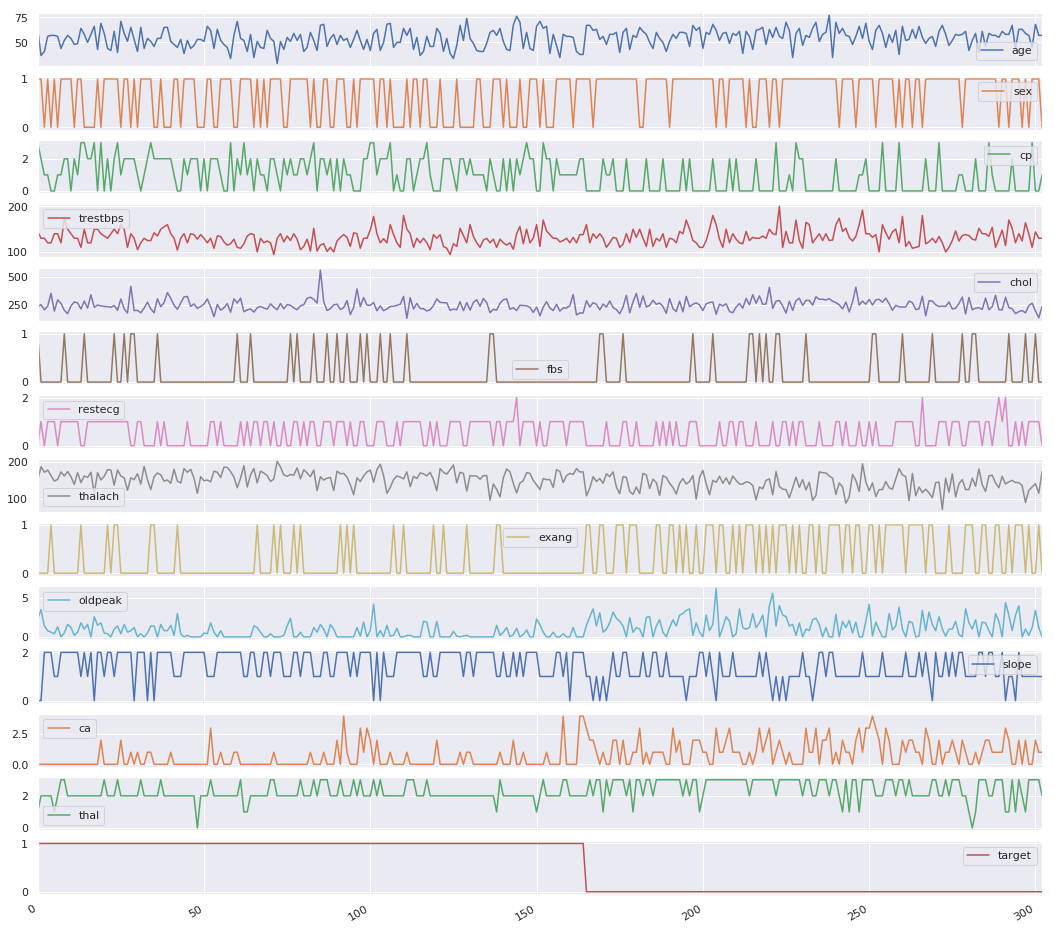

In [13]:
#subplots
df.plot(subplots=True,figsize=(18,18))
plt.show()

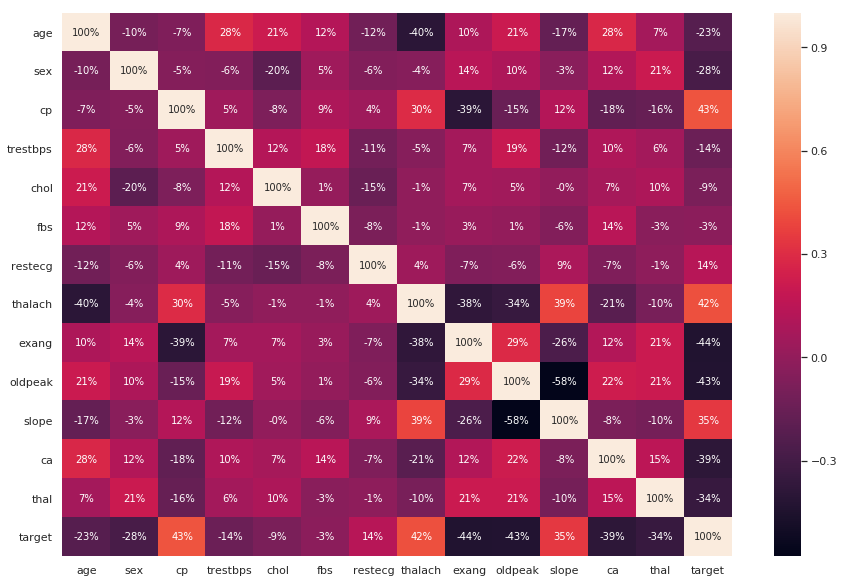

In [14]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()

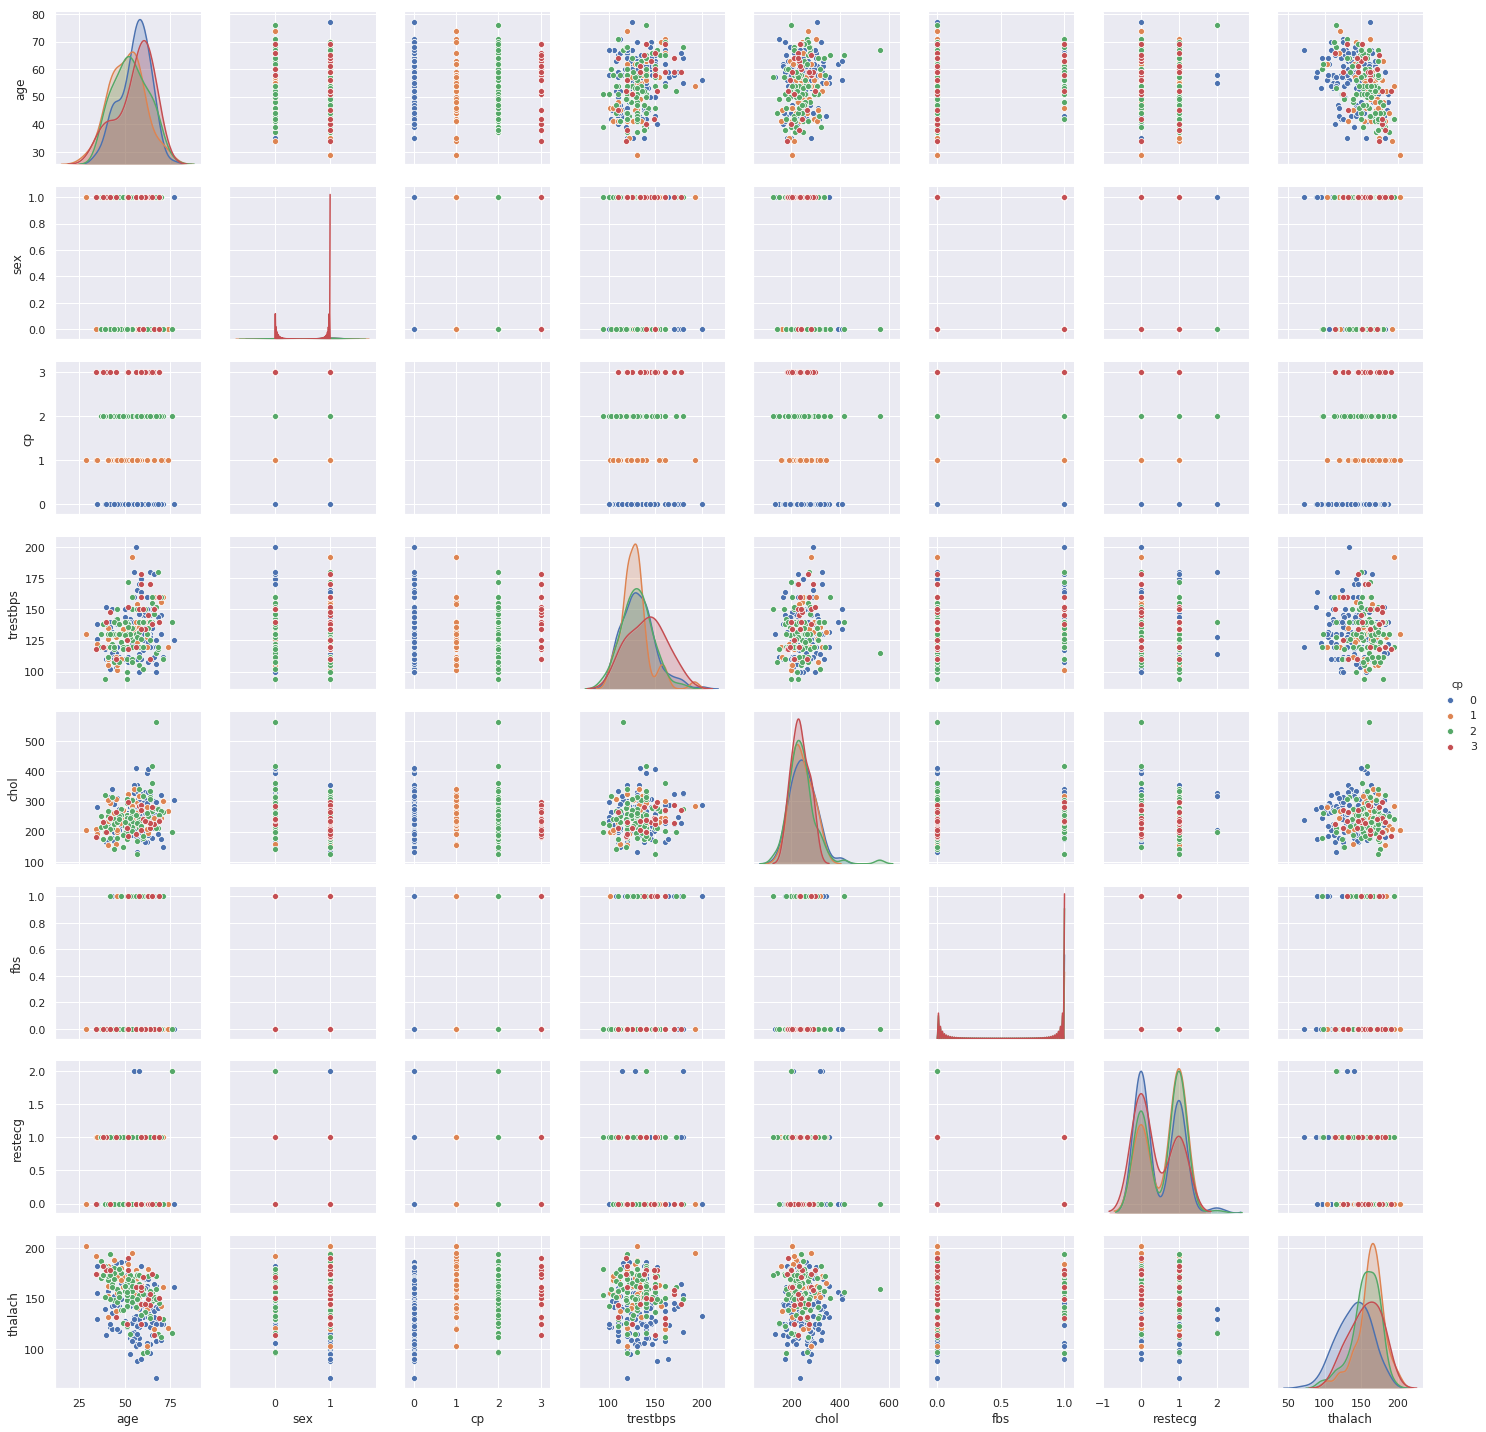

In [15]:
#create a pair plot
sns.pairplot(df.iloc[:,0:8],hue="cp")
plt.show()

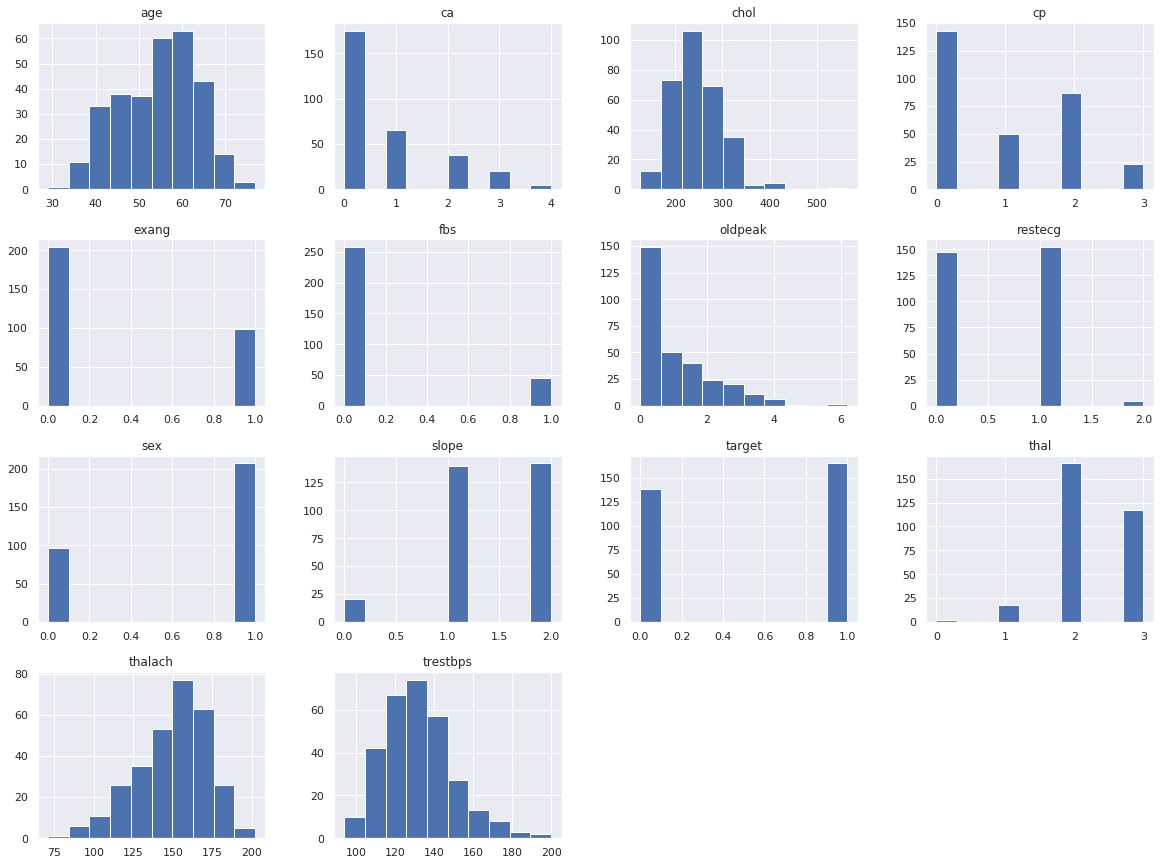

In [16]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

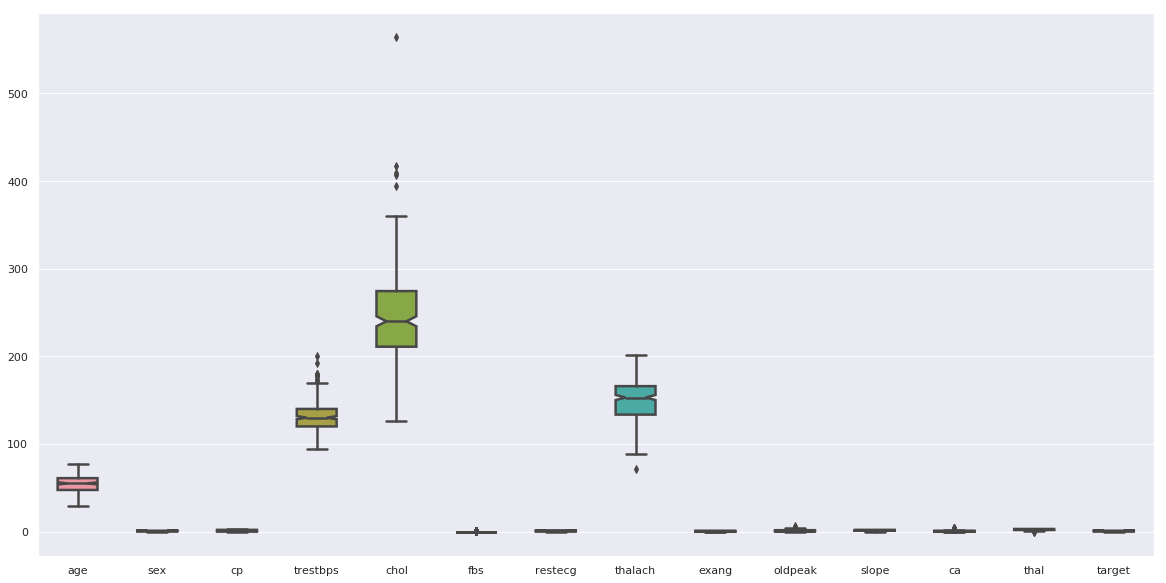

In [17]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data = df,notch = True,linewidth = 2.5, width = 0.50)
plt.show()

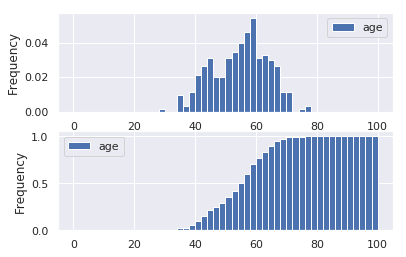

In [18]:
# histogram subplot with non cumulative and cumulative 
fig,axes=plt.subplots(nrows=2,ncols=1)

df.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[0])
df.plot(kind='hist',y='age',bins=50,range=(0,100),density=True,ax=axes[1],cumulative=True)
plt.show()

In [19]:
print(df['sex'].value_counts(dropna=False))

1    207
0     96
Name: sex, dtype: int64


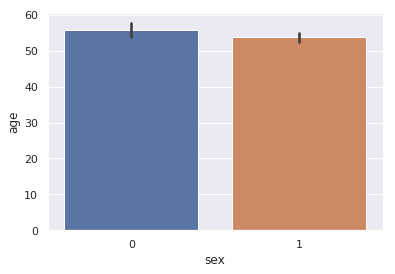

In [20]:
sns.barplot(x='sex',y='age',data=df)
plt.show()

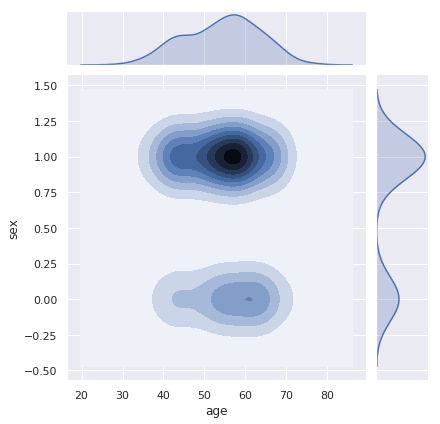

In [21]:
#jointplot
sns.jointplot(x=df.age, y=df.sex, data=df, kind="kde");

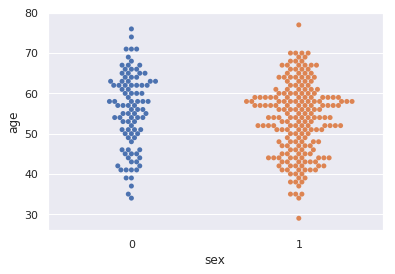

In [22]:
sns.swarmplot(x = 'sex', y = 'age', data = df)
plt.show()

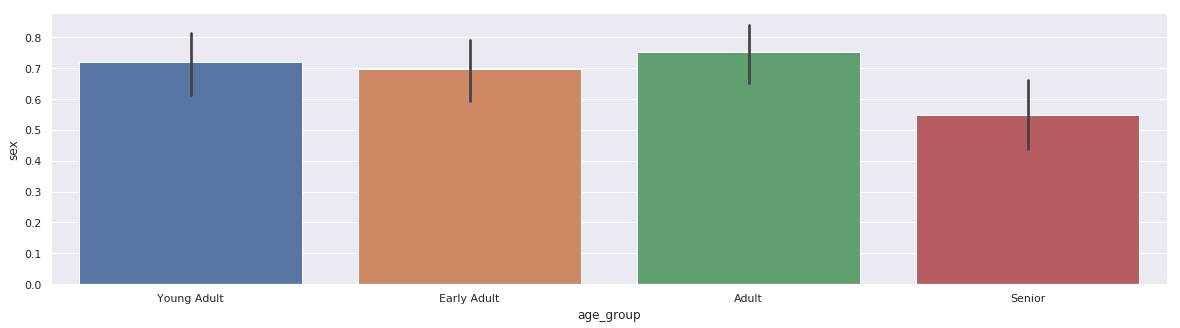

In [23]:
df['age']=df['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)
fig=plt.figure(figsize=(20,5))
sns.barplot(x='age_group',y='sex',data=df)
plt.show()

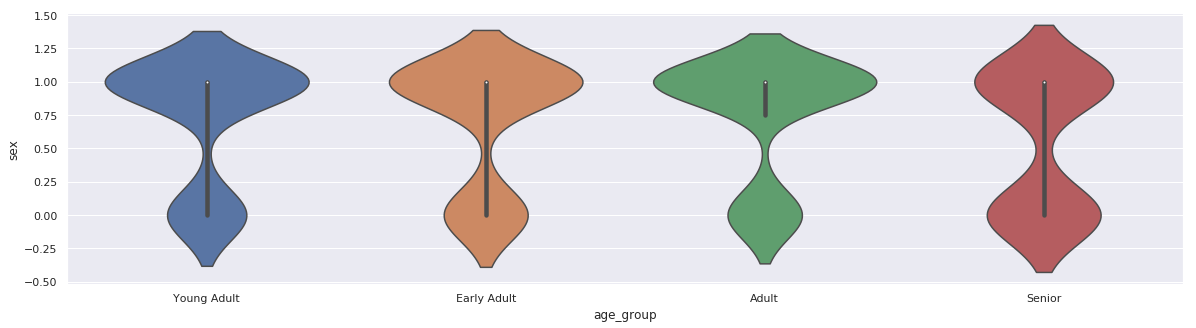

In [24]:

fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='age_group', y = 'sex', data = df)
plt.show()

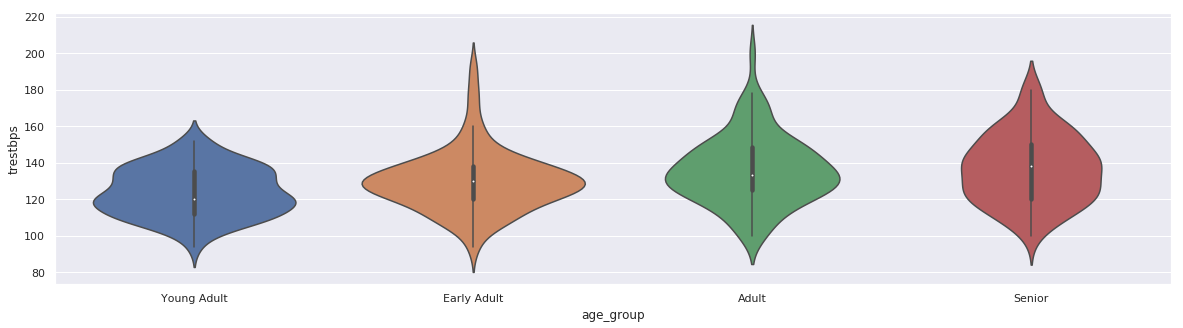

In [25]:
#sns.set_style('whitegrid')

fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='age_group', y = 'trestbps', data = df)
plt.show()

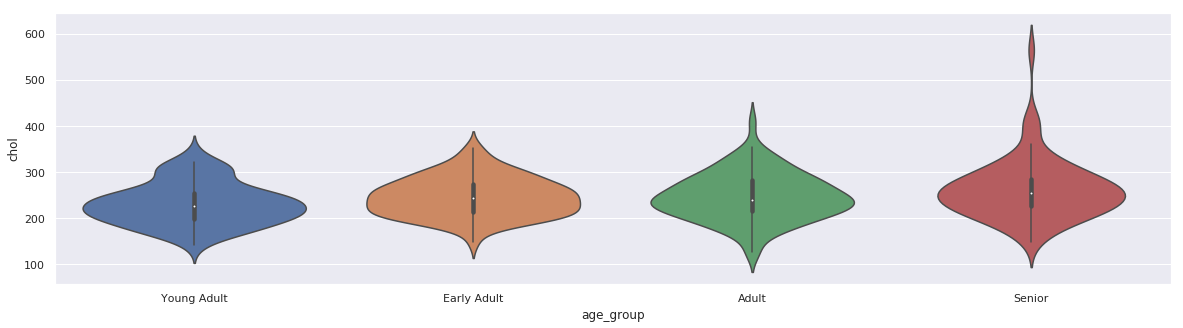

In [26]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'chol', data = df)
plt.show()

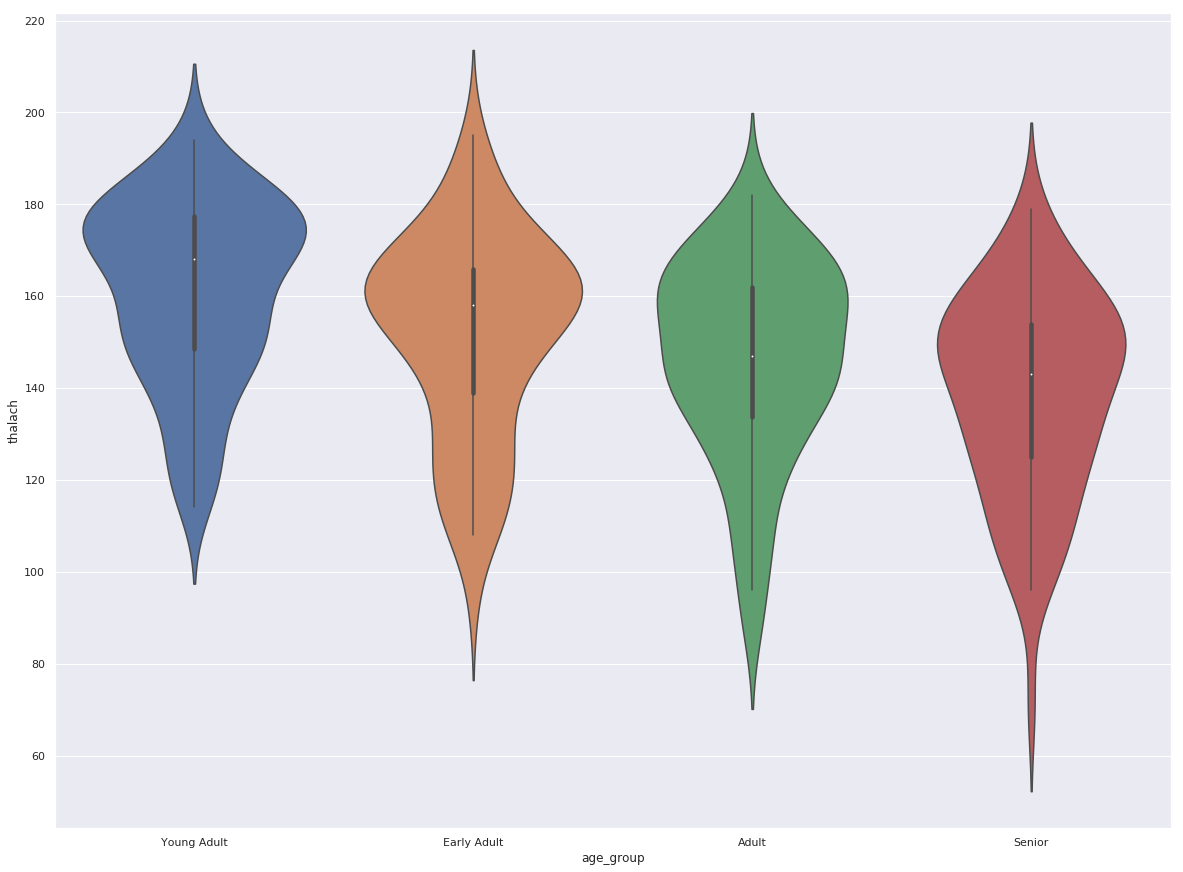

In [27]:
fig=plt.figure(figsize=(20,15))
sns.violinplot(x = 'age_group', y = 'thalach', data = df)
plt.show()

In [28]:
grp =df.groupby("age")
x= grp["chol"].agg(np.mean)
y=grp["trestbps"].agg(np.mean)
z=grp["thalach"].agg(np.mean)

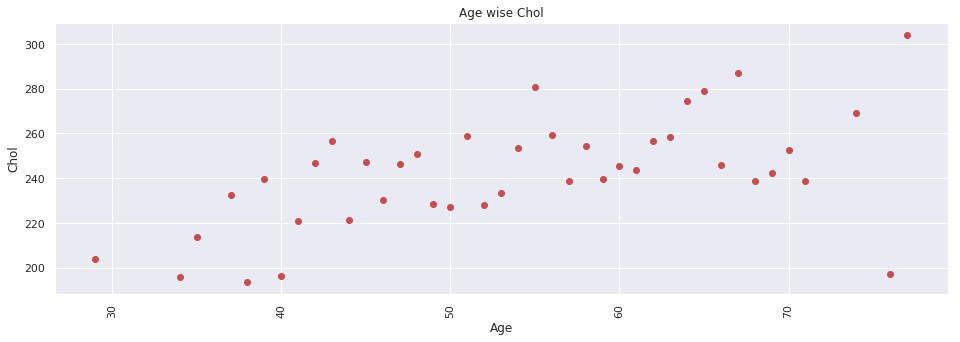

In [29]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)
plt.title("Age wise Chol")
plt.xlabel("Age")
plt.ylabel("Chol")
plt.show()

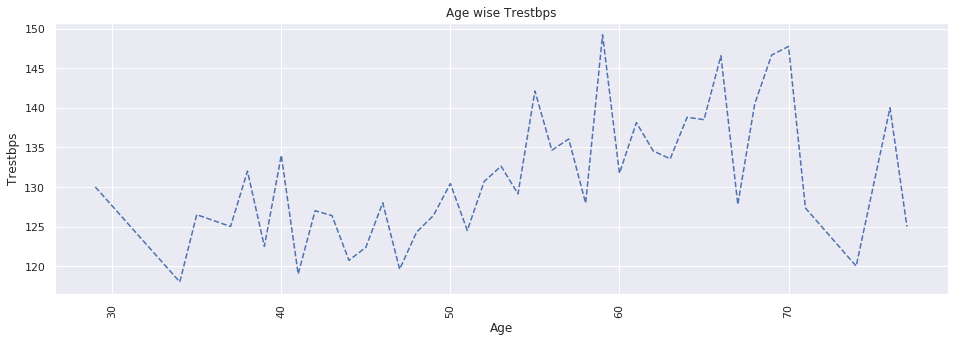

In [30]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='b')
plt.xticks(rotation=90)
plt.title("Age wise Trestbps")
plt.xlabel("Age")
plt.ylabel("Trestbps")
plt.show()

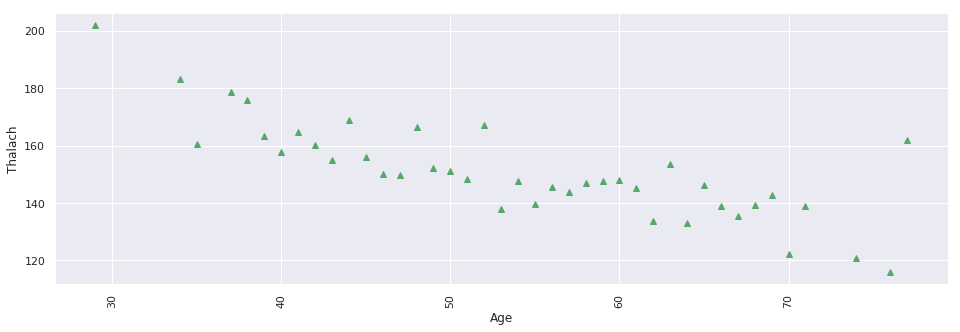

In [31]:
plt.figure(figsize=(16,5))
plt.plot(z,"g^",color='g')
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.show()

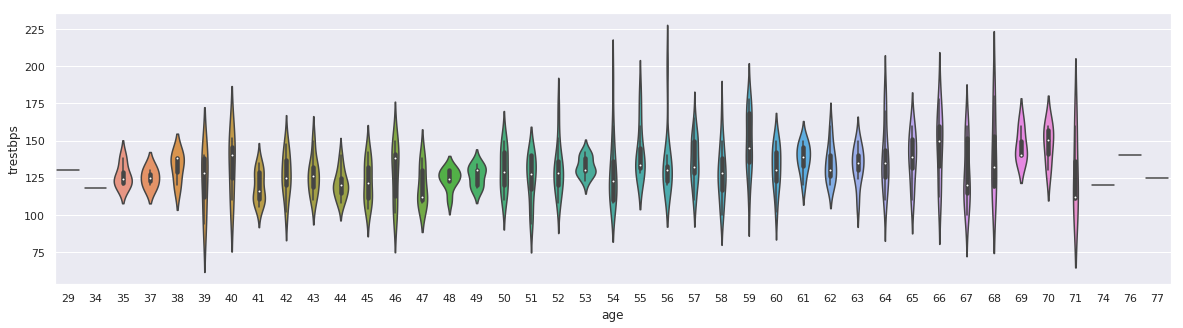

In [32]:

fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='age', y = 'trestbps', data = df)
plt.show()

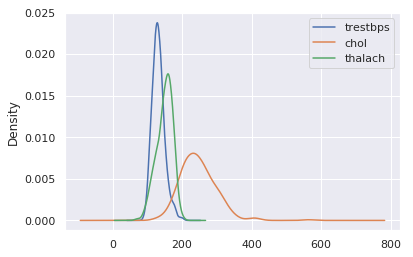

In [33]:
ax = df.trestbps.plot.kde()
ax = df.chol.plot.kde()
ax = df.thalach.plot.kde()
ax.legend()
plt.show()

<Figure size 1440x1080 with 0 Axes>

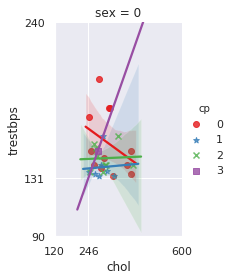

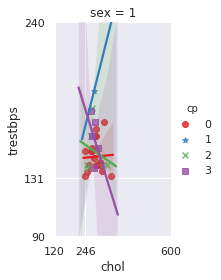

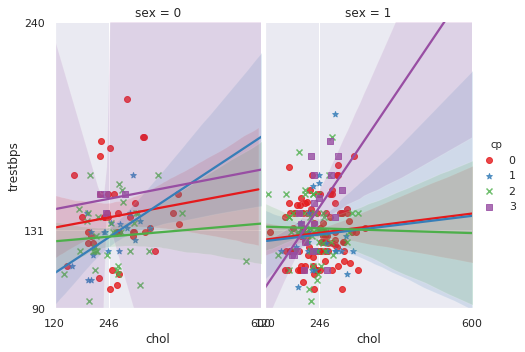

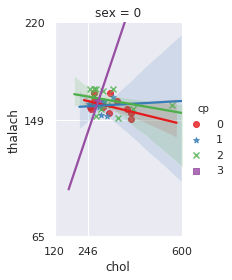

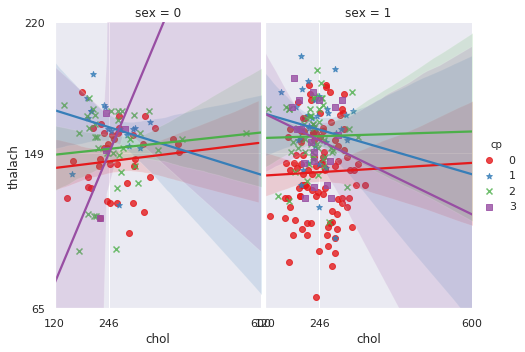

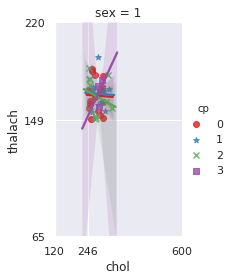

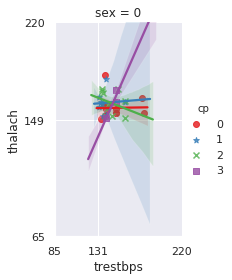

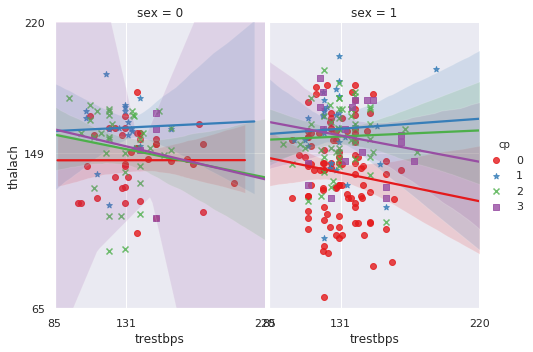

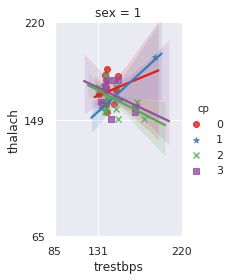

In [34]:
#xticks -> chol min,mean,max 
#yticks -> trestbps min,mean,max
filtered_class1=df[(df.chol>246) & (df.trestbps>131) & (df.sex==0)]
filtered_class4=df[(df.chol>246) & (df.trestbps>131) & (df.sex==1)]
fig=plt.figure(figsize=(20,15))

g = sns.lmplot(x="chol", y="trestbps", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class1)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="trestbps", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class4)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))


g = sns.lmplot(x="chol", y="trestbps", hue="cp",col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=df)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))




##########################################################################################################################################
filtered_class2=df[(df.chol>246) & (df.thalach>149) & (df.sex==0)]
filtered_class5=df[(df.chol>246) & (df.thalach>149) & (df.sex==1)]

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class2)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=df)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class5)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

############################################################################################################################################
filtered_class3=df[(df.trestbps>131) & (df.thalach>149) & (df.sex==0)]
filtered_class6=df[(df.trestbps>131) & (df.thalach>149) & (df.sex==1)]

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class3)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=df)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",markers=["o","*","x",'s'],data=filtered_class6)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))



<Figure size 1440x1080 with 0 Axes>

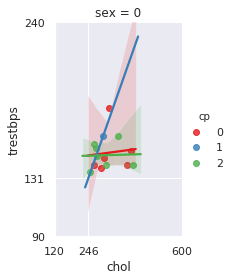

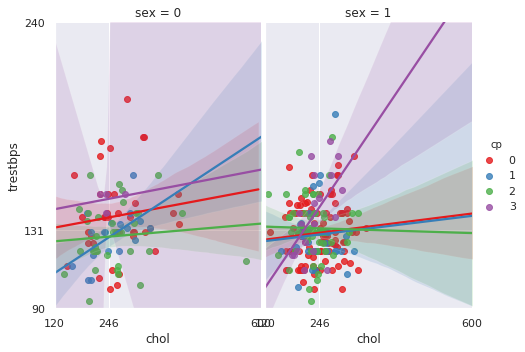

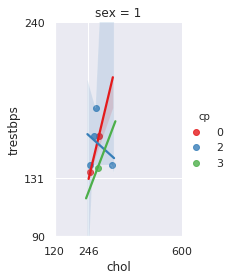

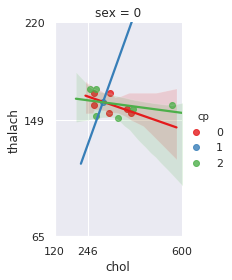

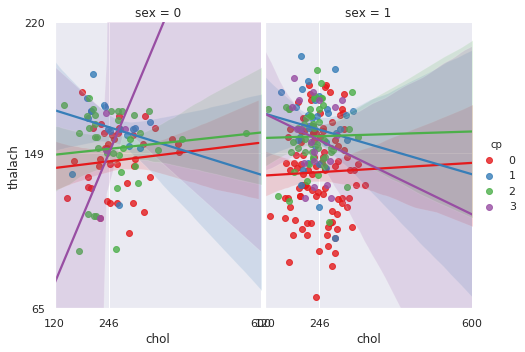

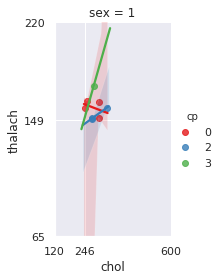

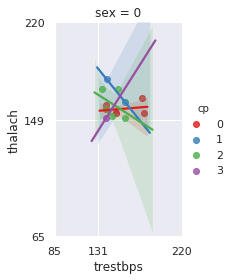

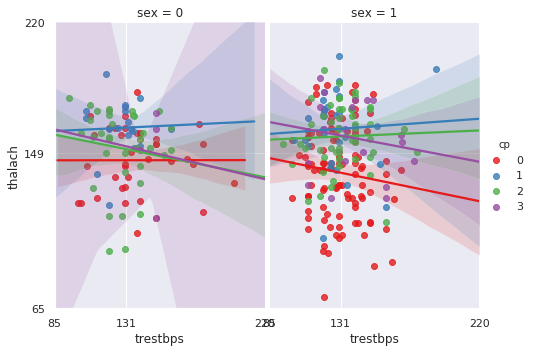

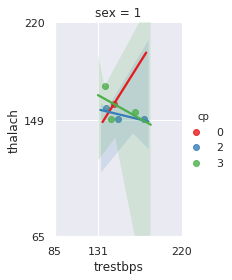

In [35]:
filtered_class1=df[(df.chol>246) & (df.trestbps>131) & (df.sex==0) & (df.age>60)]
filtered_class4=df[(df.chol>246) & (df.trestbps>131) & (df.sex==1) & (df.age>60)]

fig=plt.figure(figsize=(20,15))

g = sns.lmplot(x="chol", y="trestbps", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class1)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="trestbps", hue="cp",col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",data=df)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="trestbps", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class4)
g = (g.set_axis_labels("chol", "trestbps").set(xlim=(120, 600), ylim=(90, 240),xticks=[120, 246, 600], yticks=[90, 131, 240]).fig.subplots_adjust(wspace=.02))

##########################################################################################################################################
filtered_class2=df[(df.chol>246) & (df.thalach>149) & (df.sex==0) & (df.age>60)]
filtered_class5=df[(df.chol>246) & (df.thalach>149) & (df.sex==1) & (df.age>60)]

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class2)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",data=df)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="chol", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class5)
g = (g.set_axis_labels("chol", "thalach").set(xlim=(120, 600), ylim=(65, 220),xticks=[120, 246, 600], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

############################################################################################################################################
filtered_class3=df[(df.trestbps>131) & (df.thalach>149) & (df.sex==0) &(df.age>60)]
filtered_class6=df[(df.trestbps>131) & (df.thalach>149) & (df.sex==1) & (df.age>60)]

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class3)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex",height=5,aspect=.7, x_jitter=.1,palette="Set1",data=df)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))

g = sns.lmplot(x="trestbps", y="thalach", hue="cp", col="sex", height=4, aspect=.7, x_jitter=.1,palette="Set1",data=filtered_class6)
g = (g.set_axis_labels("trestbps", "thalach").set(xlim=(85, 220), ylim=(65, 220),xticks=[85, 131, 220], yticks=[65, 149, 220]).fig.subplots_adjust(wspace=.02))



In [36]:
print(df['cp'].value_counts(dropna=False))

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


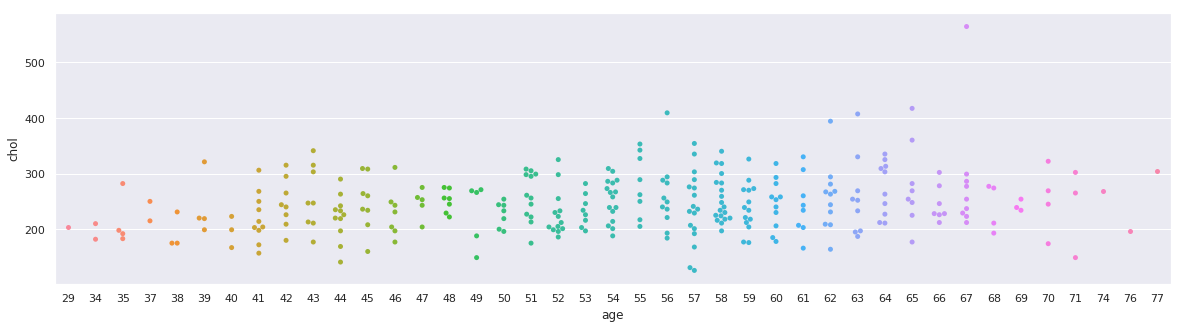

In [37]:
fig=plt.figure(figsize=(20,5))
sns.swarmplot(x = 'age', y = 'chol', data = df)
plt.show()

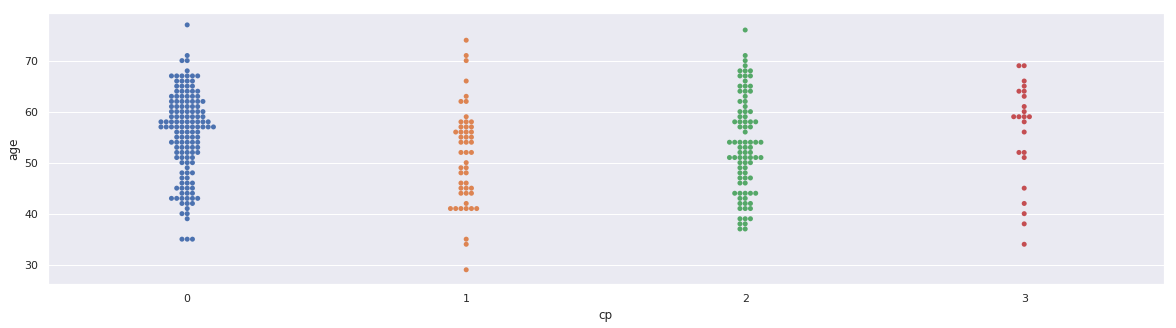

In [38]:
fig=plt.figure(figsize=(20,5))
sns.swarmplot(x = 'cp', y = 'age', data = df)
plt.show()

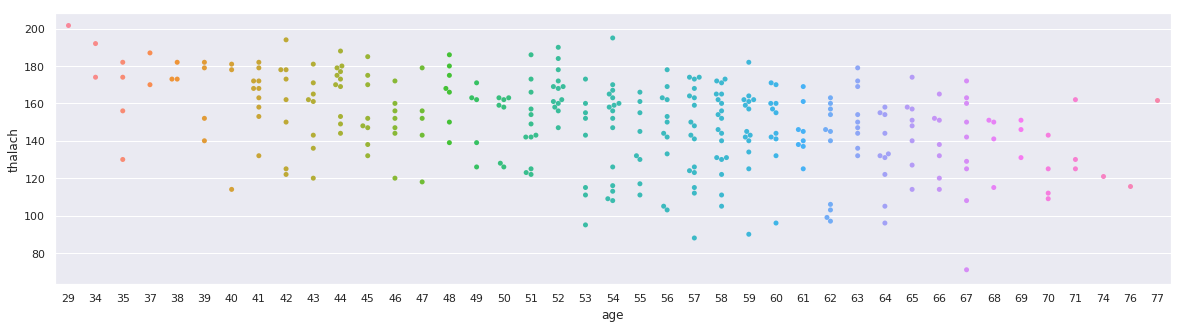

In [39]:
fig=plt.figure(figsize=(20,5))
sns.swarmplot(x = 'age', y = 'thalach', data = df)
plt.show()

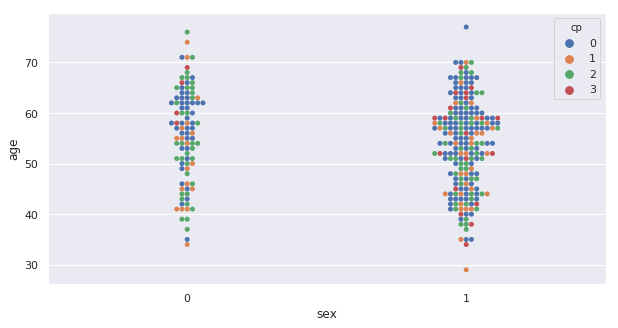

In [40]:
fig=plt.figure(figsize=(10,5))
sns.swarmplot(x="sex", y="age",hue="cp", data=df)
plt.show()

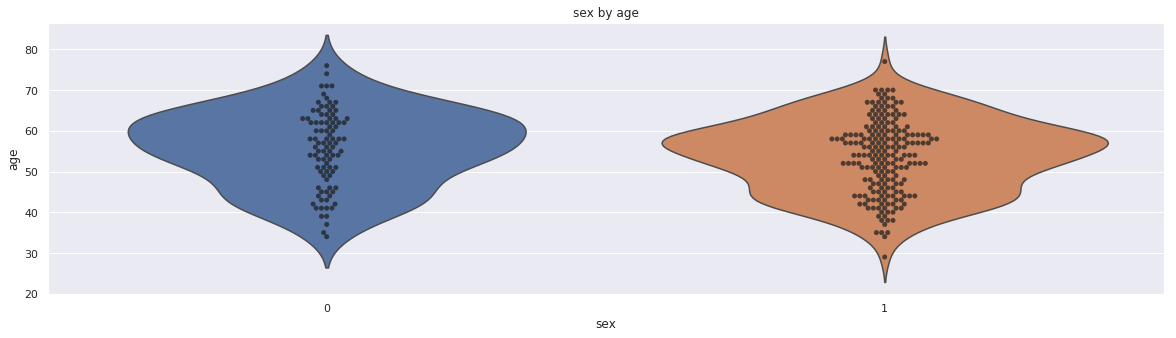

In [41]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'sex', 
               y = 'age', 
               data = df, 
               inner = None, 
               )

sns.swarmplot(x = 'sex', 
              y = 'age', 
              data = df, 
              color = 'k', 
              alpha = 0.7)

plt.title('sex by age')
plt.show()

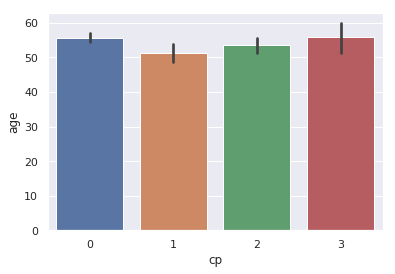

In [42]:
#barplot
sns.barplot(x='cp',y='age',data=df)
plt.show()

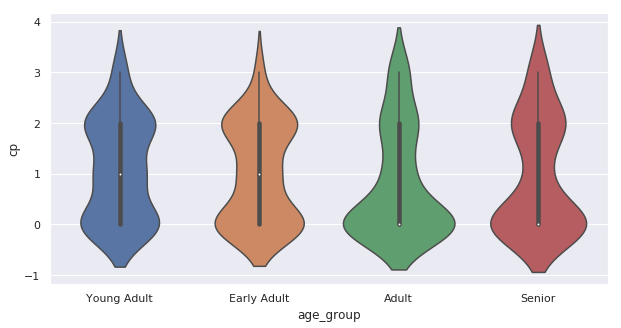

In [43]:
fig=plt.figure(figsize=(10,5))
sns.violinplot(x = 'age_group', y = 'cp', data = df)
plt.show()

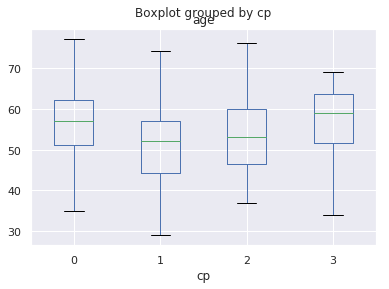

In [44]:
#boxplot
df.boxplot(column='age', by='cp')
plt.show()

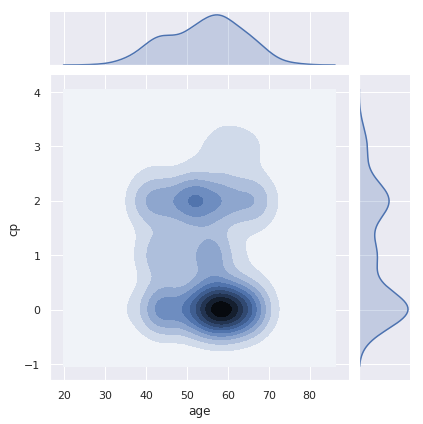

In [45]:
#jointplot
sns.jointplot(x=df.age, y=df.cp, data=df, kind="kde");

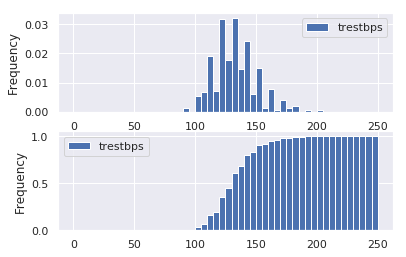

In [46]:
# histogram subplot with non cumulative and cumulative

fig,axes=plt.subplots(nrows=2,ncols=1)
df.plot(kind="hist",y="trestbps",bins=50, range=(0,250),normed=True,ax=axes[0])
df.plot(kind="hist",y="trestbps",bins=50, range=(0,250),normed=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt.show()

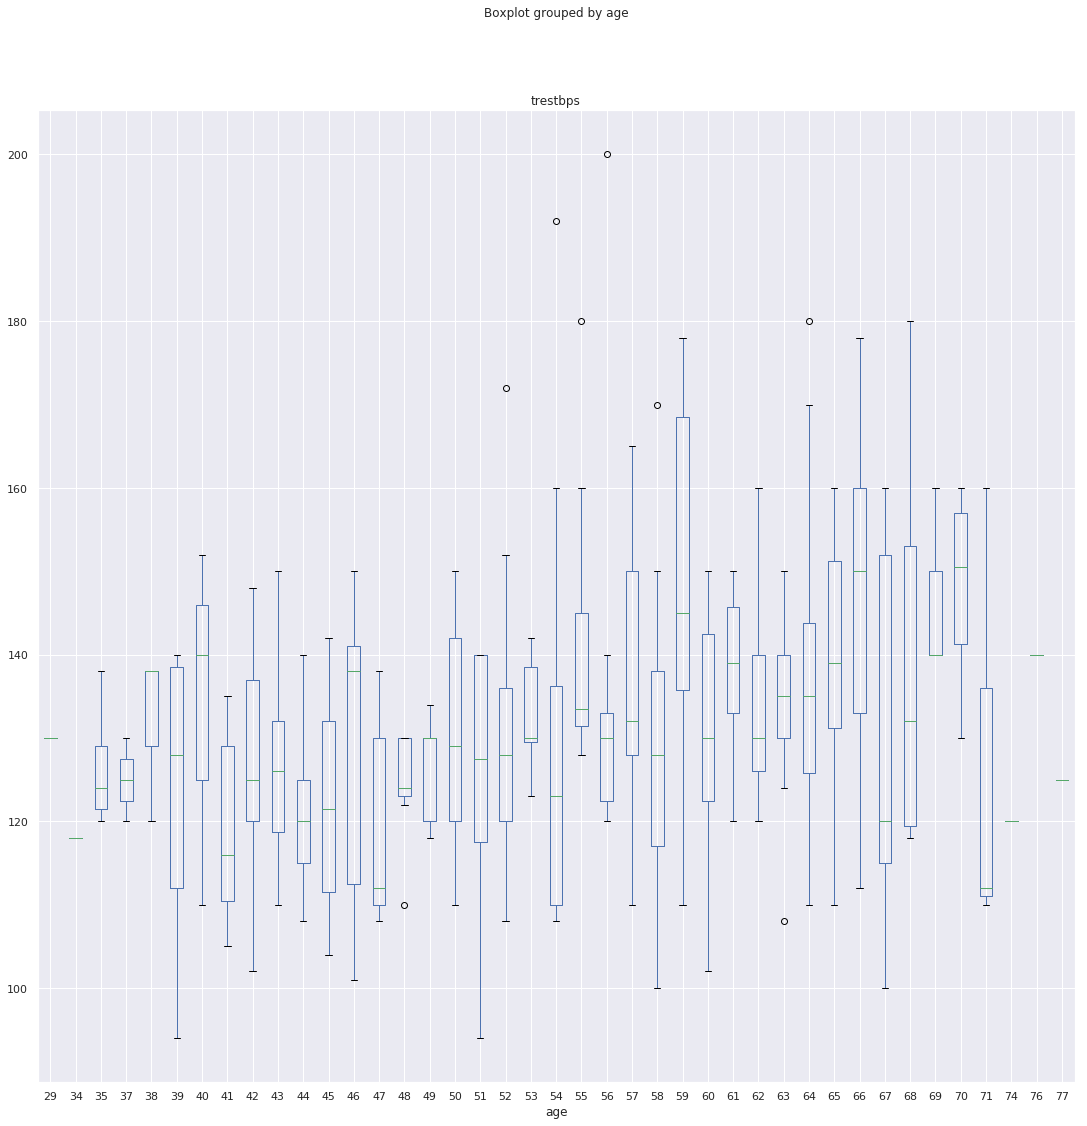

In [47]:
#boxplot
df.boxplot(column='trestbps',by='age', figsize=(18,18))
plt.show()

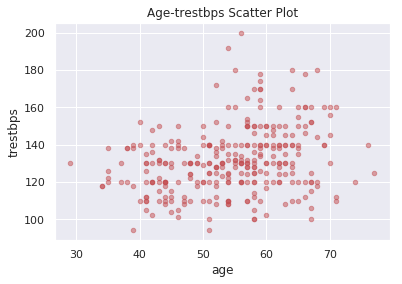

In [48]:
# Scatter Plot
#age vs. trestbps
df.plot(kind='scatter',x='age',y='trestbps',alpha=0.5,color='r')
plt.xlabel('age') # label = name of label
plt.ylabel('trestbps')
plt.title('Age-trestbps Scatter Plot')  # title = title of plot
plt.show()

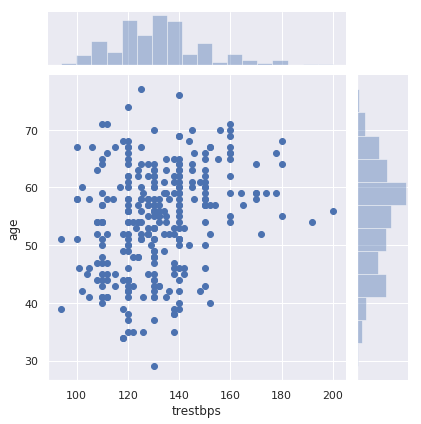

In [49]:
#jointplot
sns.jointplot(x="trestbps", y="age", data=df);

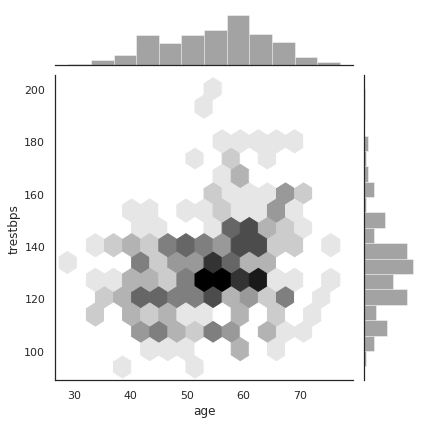

In [50]:
#jointplot hex

with sns.axes_style("white"):
    sns.jointplot(x=df.age, y=df.trestbps, kind="hex", color="k");

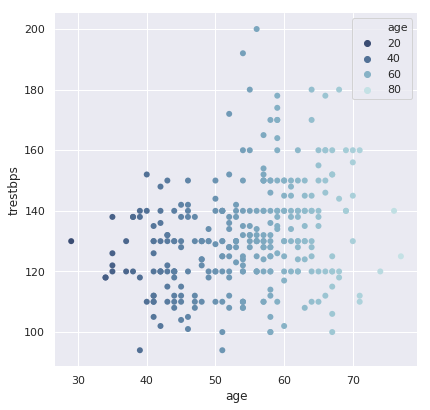

In [51]:
#scatter plot
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
age_group = ["Young Adult","Middle-Aged Adults","Old Adults"]
sns.scatterplot(x="age", y="trestbps",
                hue="age",
                palette="ch:r=-.2,d=.3_r",
                hue_order=age_group,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)
plt.show()

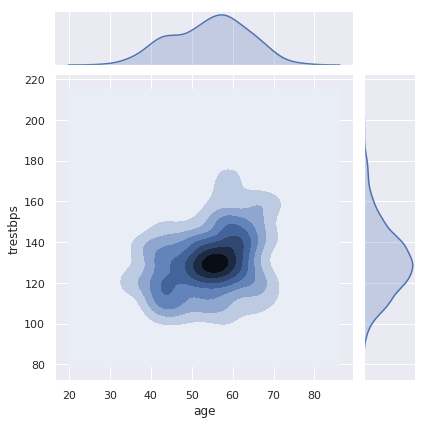

In [52]:
#jointplot
sns.jointplot(x=df.age, y=df.trestbps, data=df, kind="kde");

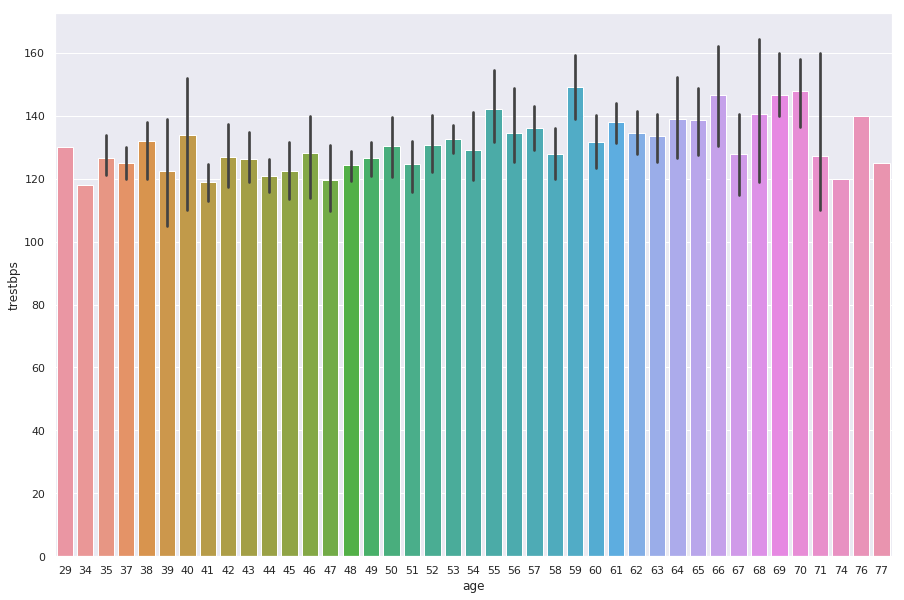

In [53]:
#barplot
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='trestbps',data=df)
plt.show()

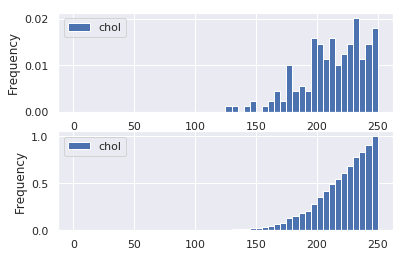

In [54]:
# histogram subplot with non cumulative and cumulative

fig,axes=plt.subplots(nrows=2,ncols=1)
df.plot(kind="hist",y="chol",bins=50, range=(0,250),normed=True,ax=axes[0])
df.plot(kind="hist",y="chol",bins=50, range=(0,250),normed=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt.show()

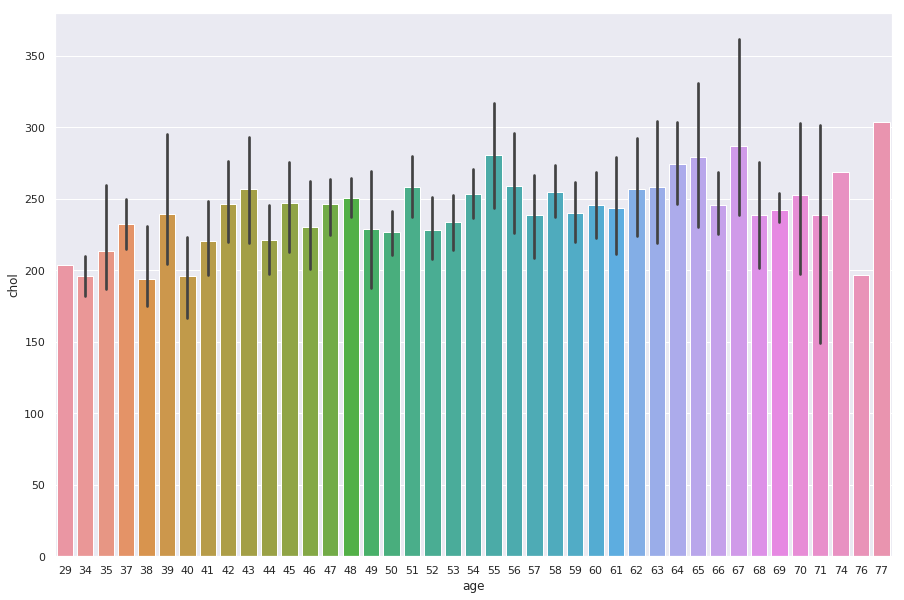

In [55]:
#barplot
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='chol',data=df)
plt.show()

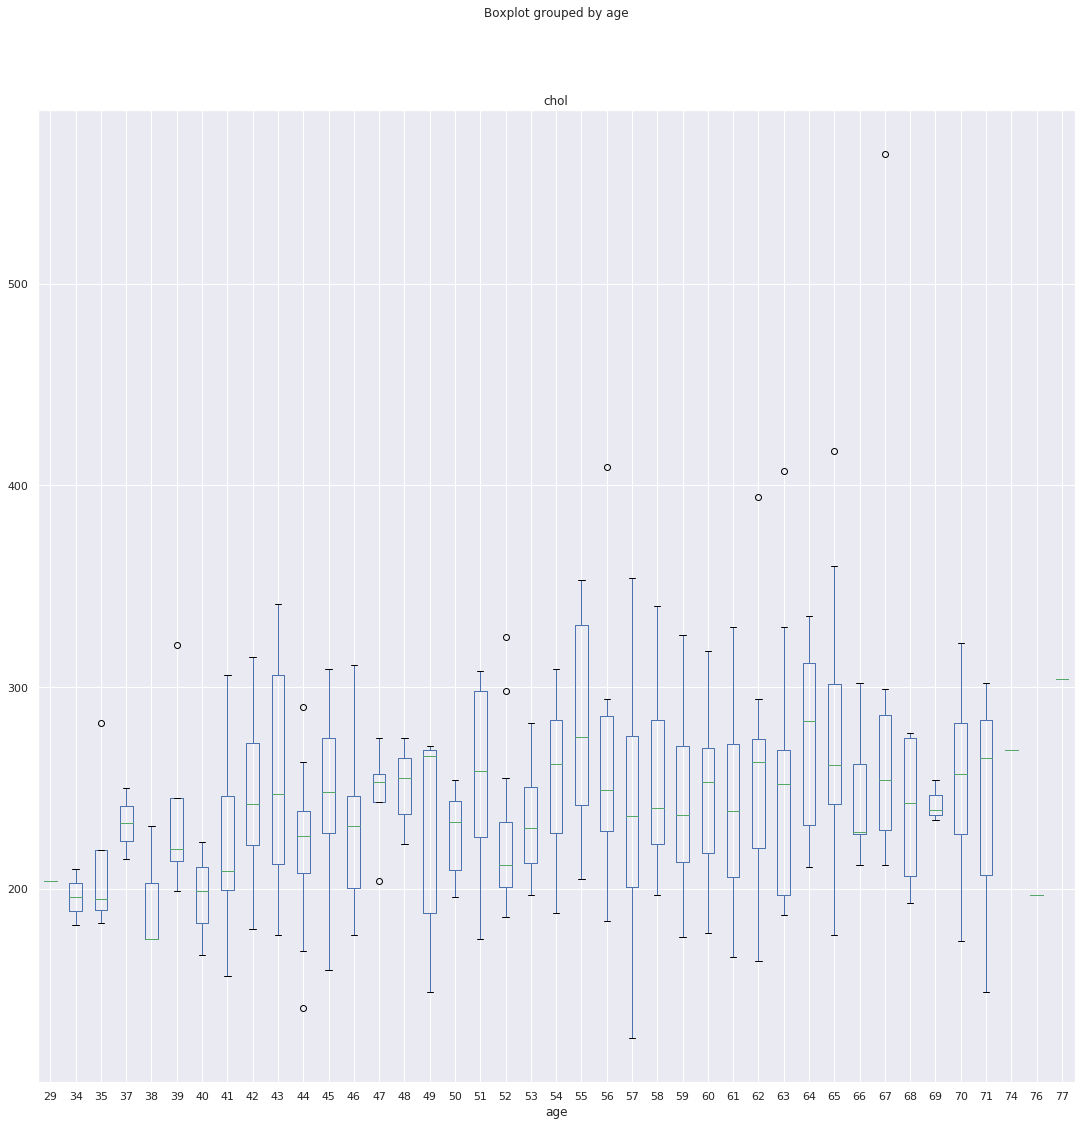

In [56]:
#boxplot
df.boxplot(column='chol',by='age',figsize=(18,18))
plt.show()

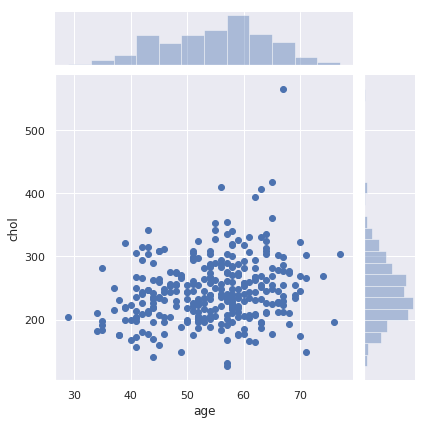

In [57]:
#jointplot
sns.jointplot(x="age", y="chol", data=df);

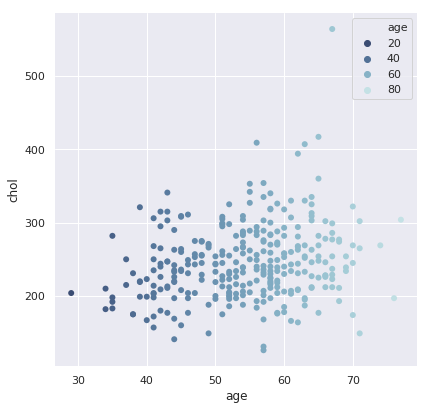

In [58]:
#scatter plot
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
age_group = ["Young Adult","Middle-Aged Adults","Old Adults"]
sns.scatterplot(x="age", y="chol",
                hue="age",
                palette="ch:r=-.2,d=.3_r",
                hue_order=age_group,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)
plt.show()

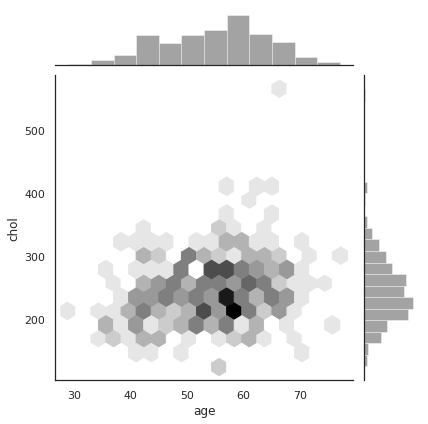

In [59]:
#jointplot
with sns.axes_style("white"):
    sns.jointplot(x=df.age, y=df.chol, kind="hex", color="k");

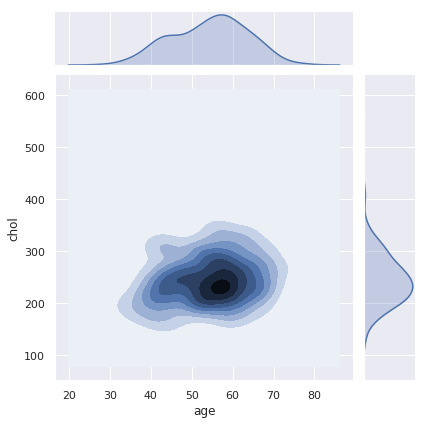

In [60]:
#jointplot
sns.jointplot(x=df.age, y=df.chol, data=df, kind="kde");

In [61]:
print(df['fbs'].value_counts(dropna=False))

0    258
1     45
Name: fbs, dtype: int64


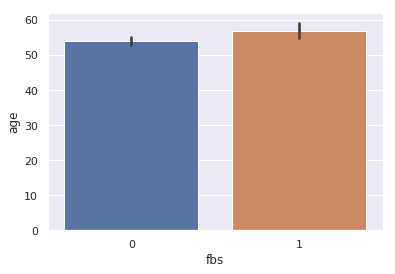

In [62]:
#barplot
sns.barplot(x='fbs',y='age',data=df)
plt.show()

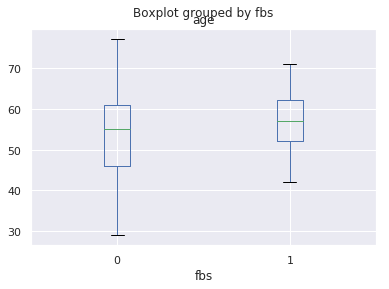

In [63]:
#box plot
df.boxplot(column='age',by='fbs')
plt.show()

In [64]:
print(df['restecg'].value_counts(dropna=False))

1    152
0    147
2      4
Name: restecg, dtype: int64


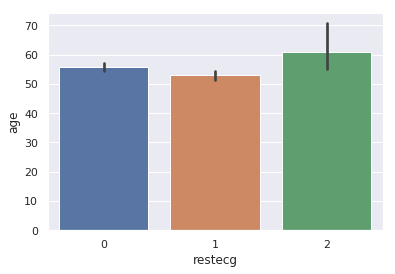

In [65]:
#barplot
sns.barplot(x='restecg',y='age',data=df)
plt.show()

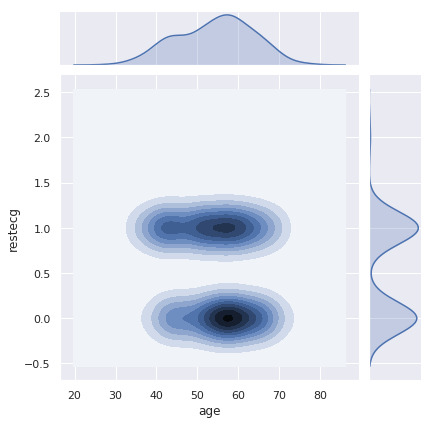

In [66]:
#jointplot
sns.jointplot(x=df.age, y=df.restecg, data=df, kind="kde");

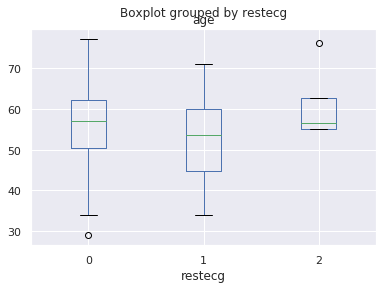

In [67]:
#boxplot
df.boxplot(column='age',by='restecg')
plt.show()

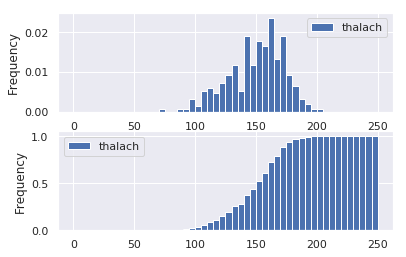

In [68]:
# histogram subplot with non cumulative and cumulative

fig,axes=plt.subplots(nrows=2,ncols=1)
df.plot(kind="hist",y="thalach",bins=50, range=(0,250),normed=True,ax=axes[0])
df.plot(kind="hist",y="thalach",bins=50, range=(0,250),normed=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt.show()

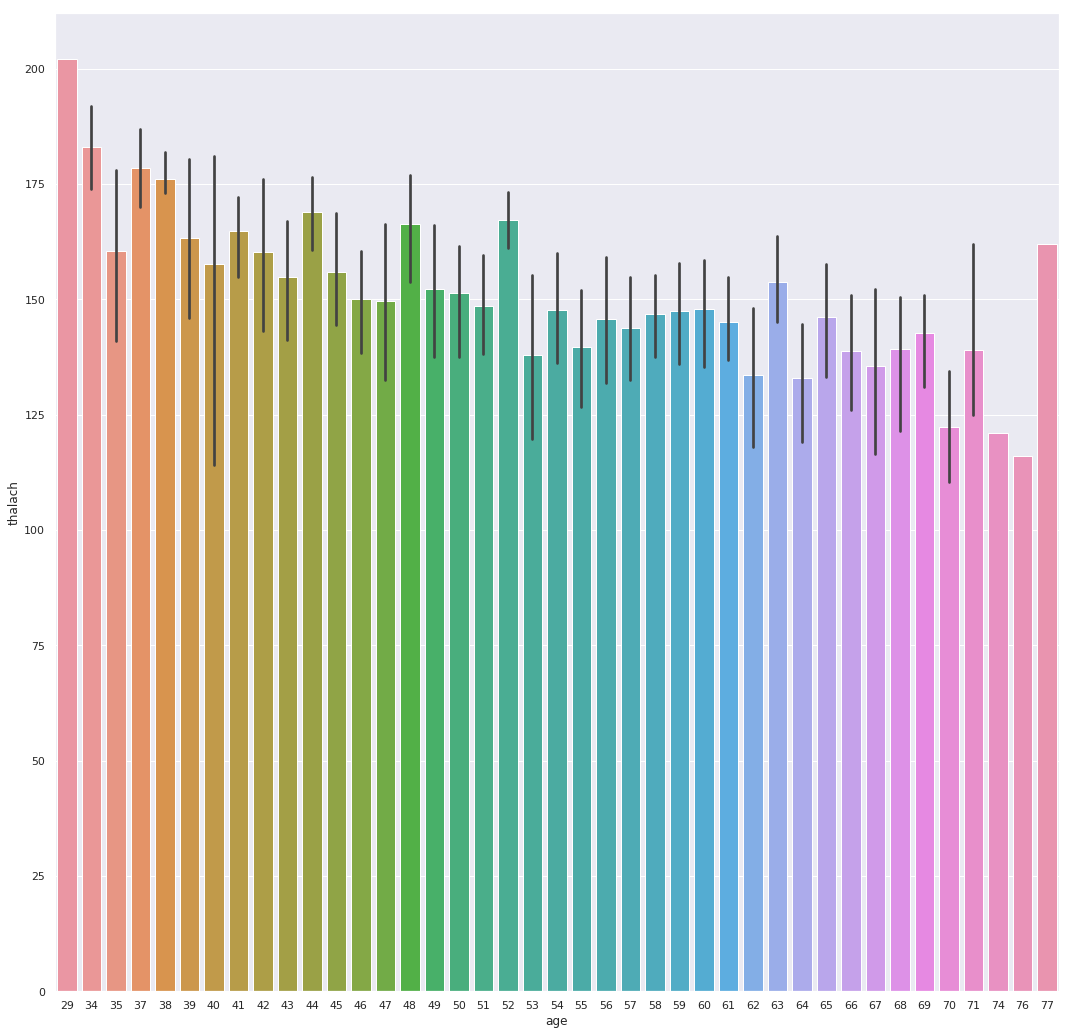

In [69]:
#barplot
plt.figure(figsize=(18,18))
sns.barplot(x='age',y='thalach',data=df)
plt.show()

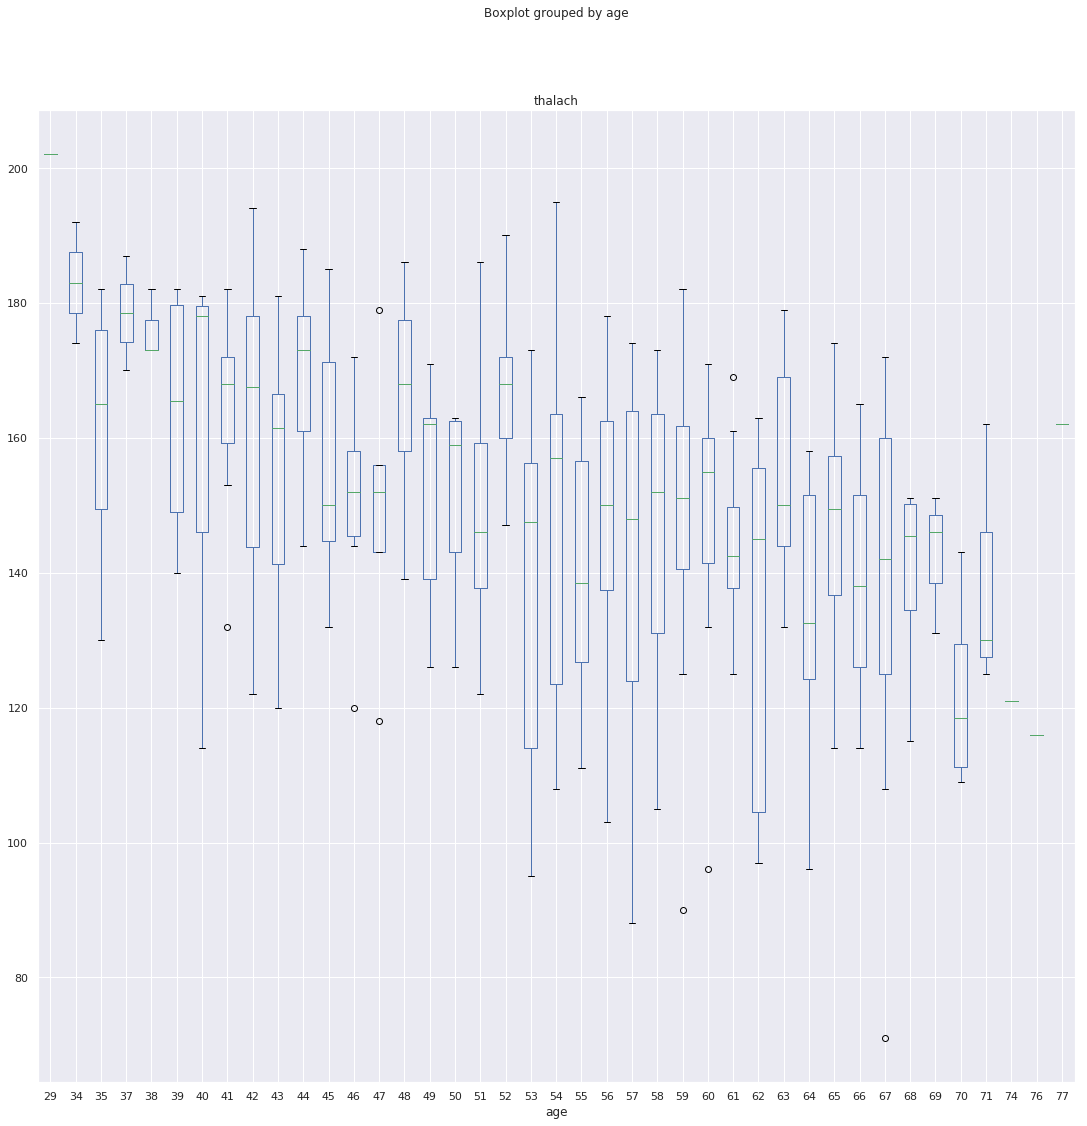

In [70]:
#boxplot
df.boxplot(column='thalach', by='age',figsize=(18,18))
plt.show()

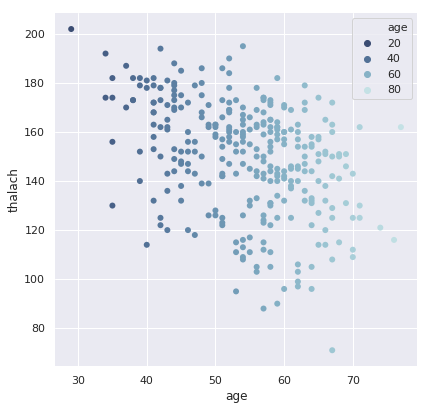

In [71]:
#scatter plot
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
age_group = ["Young Adult","Middle-Aged Adults","Old Adults"]
sns.scatterplot(x="age", y="thalach",
                hue="age",
                palette="ch:r=-.2,d=.3_r",
                hue_order=age_group,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)
plt.show()

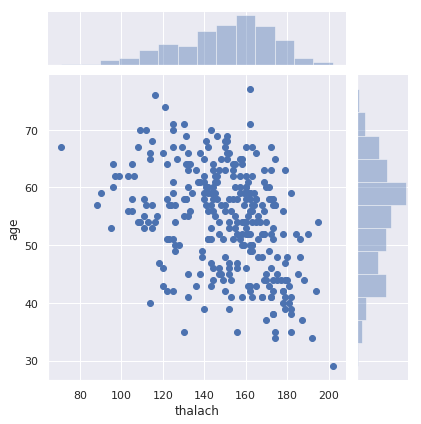

In [72]:
#jointplot
sns.jointplot(x="thalach", y="age", data=df);

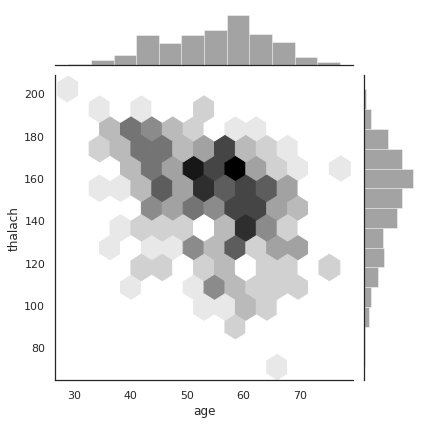

In [73]:
#jointplot
with sns.axes_style("white"):
    sns.jointplot(x=df.age, y=df.thalach, kind="hex", color="k");

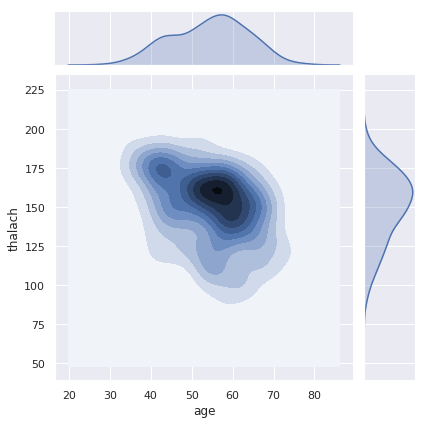

In [74]:
#jointplot
sns.jointplot(x=df.age, y=df.thalach, data=df, kind="kde");

In [75]:
print(df['exang'].value_counts(dropna=False))

0    204
1     99
Name: exang, dtype: int64


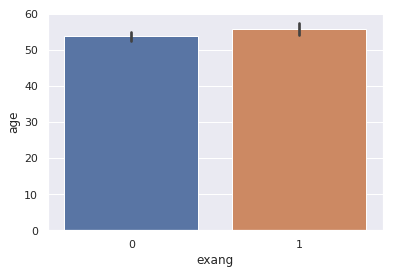

In [76]:
#barplot
sns.barplot(x='exang',y='age', data=df)
plt.show()

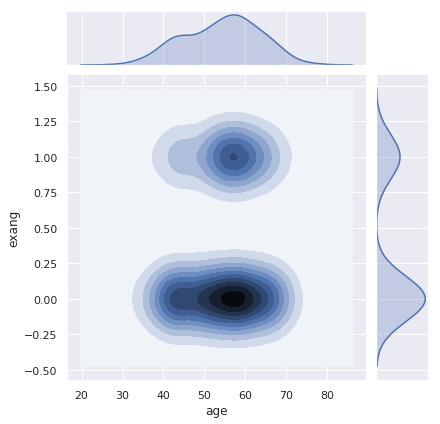

In [77]:
#jointplot
sns.jointplot(x=df.age, y=df.exang, data=df, kind="kde");

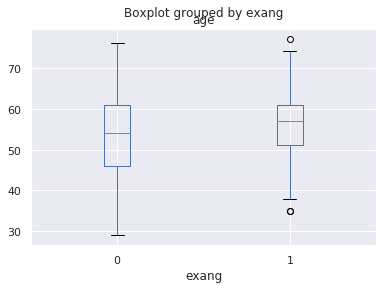

In [78]:
#boxplot
df.boxplot(column='age',by='exang')
plt.show()

In [79]:
print(df['ca'].value_counts(dropna=False))

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


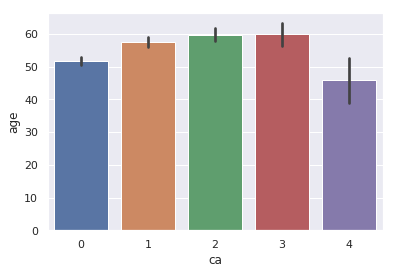

In [80]:
#barplot
sns.barplot(x='ca',y='age',data=df)
plt.show()

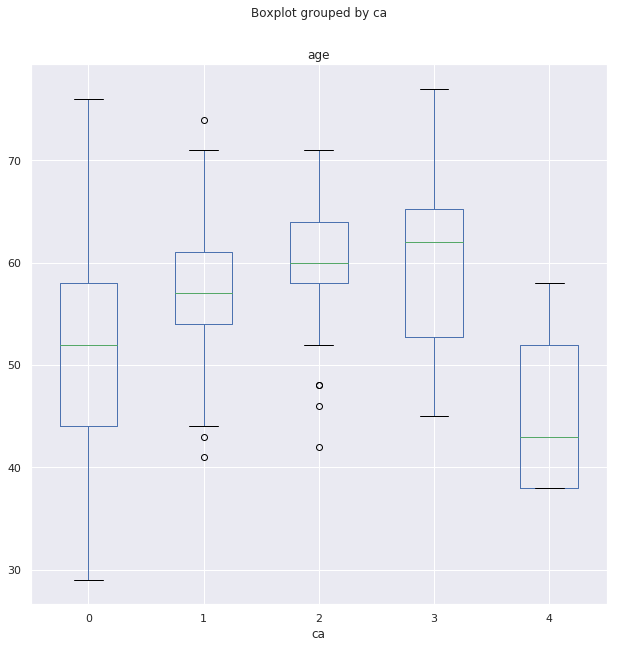

In [81]:
#boxplot
df.boxplot(column='age',by='ca', figsize=(10,10))
plt.show()

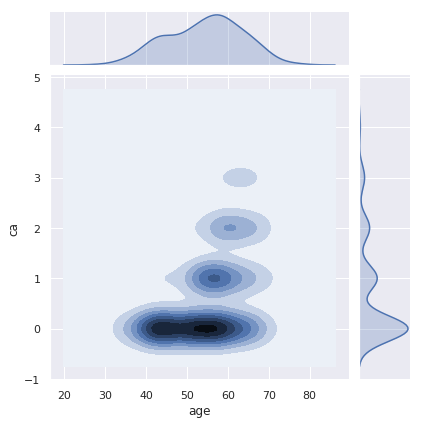

In [82]:
#jointplot
sns.jointplot(x=df.age, y=df.ca, data=df, kind="kde");

In [83]:
print(df['thal'].value_counts(dropna=False))

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


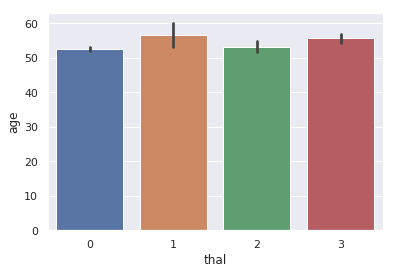

In [84]:
#barplot
sns.barplot(x='thal',y='age',data=df)
plt.show()

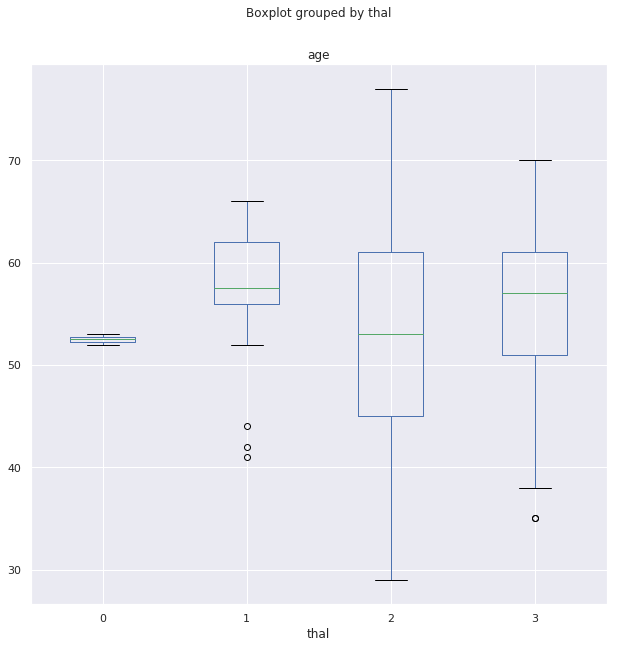

In [85]:
#boxplot
df.boxplot(column='age',by='thal',figsize=(10,10))
plt.show()

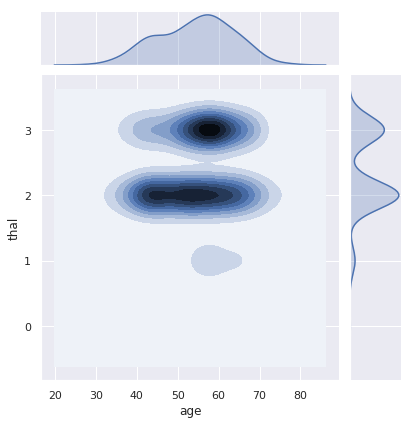

In [86]:
#jointplot
sns.jointplot(x=df.age, y=df.thal, data=df, kind="kde");

In [87]:
print(df['target'].value_counts(dropna=False))

1    165
0    138
Name: target, dtype: int64


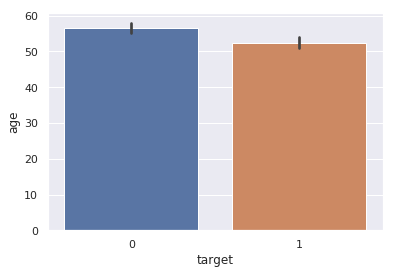

In [88]:
#barplot
sns.barplot(x='target',y='age',data=df)
plt.show()


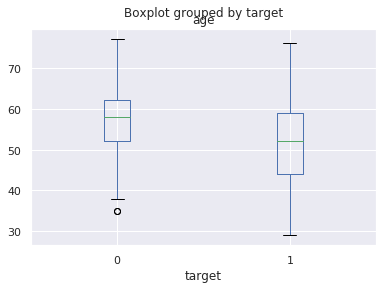

In [89]:
#boxplot
df.boxplot(column='age',by='target')
plt.show()

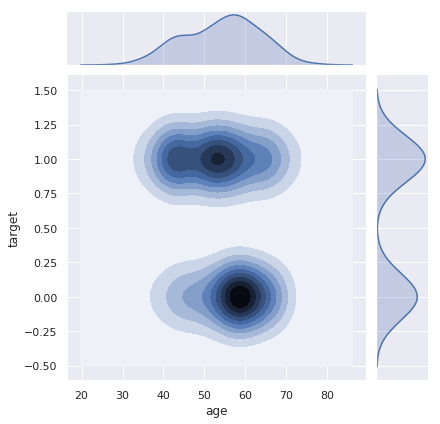

In [90]:
#jointplot
sns.jointplot(x=df.age, y=df.target, data=df, kind="kde");

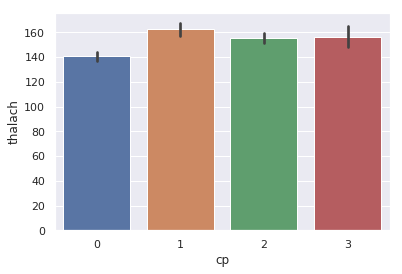

In [91]:
#barplot
sns.barplot(x='cp',y='thalach',data=df)
plt.show()

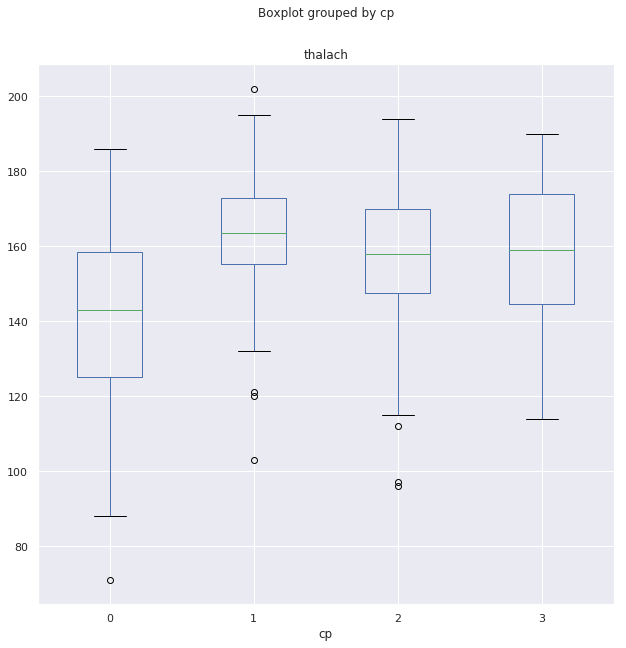

In [92]:
#boxplot
df.boxplot(column='thalach',by='cp', figsize=(10,10))
plt.show()

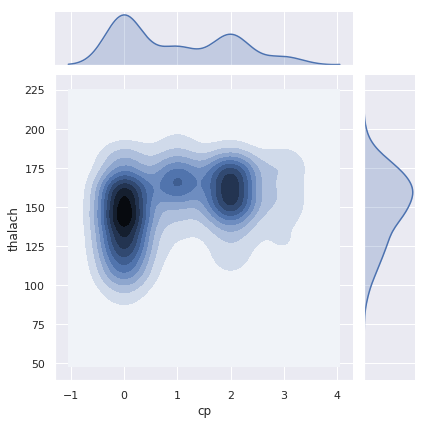

In [93]:
#jointplot
sns.jointplot(x=df.cp, y=df.thalach, data=df, kind="kde");

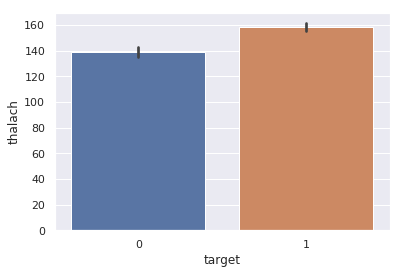

In [94]:
#barplot
sns.barplot(x='target',y='thalach',data=df)
plt.show()

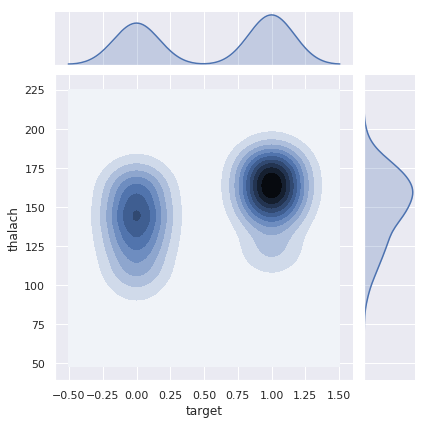

In [95]:
#jointplot
sns.jointplot(x=df.target, y=df.thalach, data=df, kind="kde");

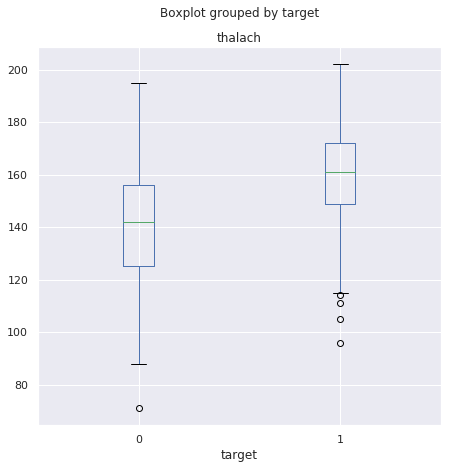

In [96]:
#boxplot
df.boxplot(column='thalach',by='target', figsize=(7,7))
plt.show()

In [97]:
new_df=df.iloc[:,[0,1,3,4,7]]
new_df.head()

age  sex  trestbps  chol  thalach
0   63    1       145   233      150
1   37    1       130   250      187
2   41    0       130   204      172
3   56    1       120   236      178
4   57    0       120   354      163

**pd.plotting.scatter_matrix:
**
* green: female and red: male
* c: color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type

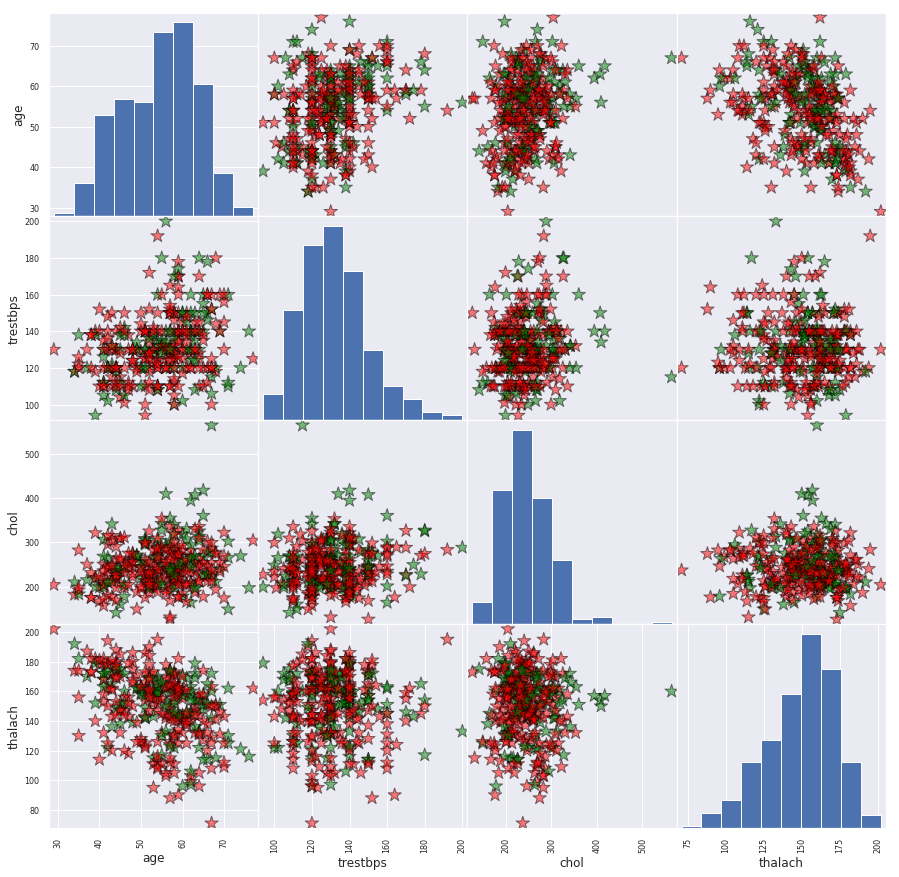

In [98]:
color_list = ['red' if i==1 else 'green' for i in new_df.loc[:,'sex']]
pd.plotting.scatter_matrix(new_df.loc[:, new_df.columns != 'sex'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

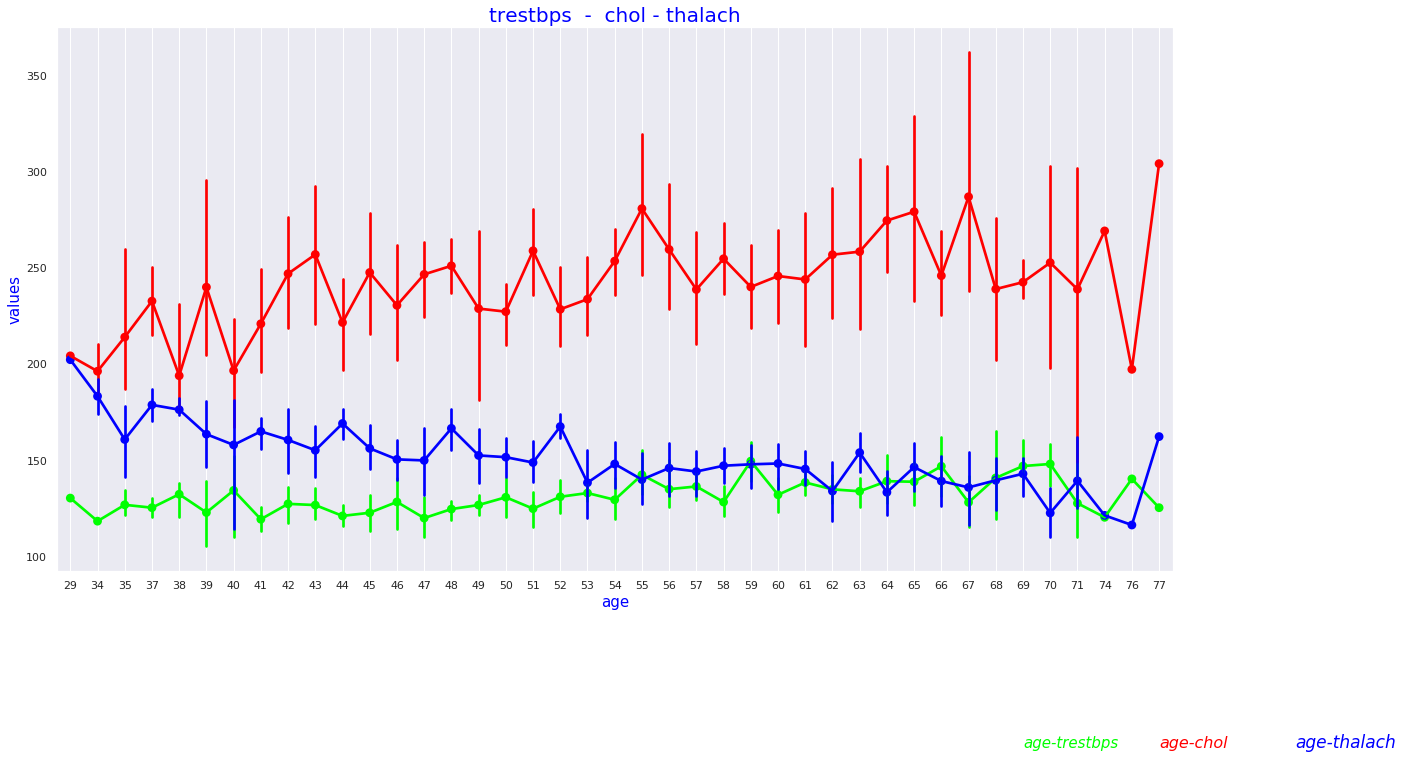

In [99]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='age',y='trestbps',data=df,color='lime',alpha=0.8)
sns.pointplot(x='age',y='chol',data=df,color='red',alpha=0.8)
sns.pointplot(x='age',y='thalach',data=df,color='blue',alpha=0.8)
plt.text(35,0.4,'age-trestbps',color='lime',fontsize = 15,style = 'italic')
plt.text(40,0.5,'age-chol',color='red',fontsize = 16,style = 'italic')
plt.text(45,0.6,'age-thalach',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('age',fontsize = 15,color='blue')
plt.ylabel('values',fontsize = 15,color='blue')
plt.title('trestbps  -  chol - thalach',fontsize = 20,color='blue')
plt.grid()

Text(0.5, 1.0, 'Target People According to Chestpain Type')

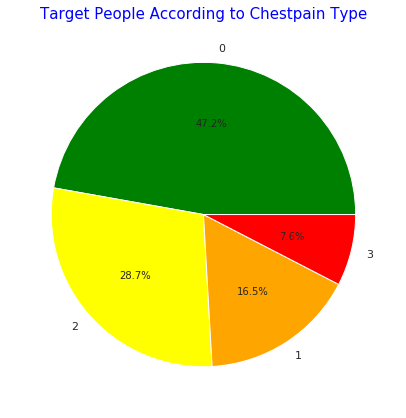

In [100]:
df.cp.dropna(inplace = True)
labels = df.cp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = df.cp.value_counts().values

# visual cp
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Target People According to Chestpain Type',color = 'blue',fontsize = 15)

**<h1>Filtering</h1>**


In [101]:
#female
df[(df['sex']==0) & (df['age']>50) & (df['ca']>0) & (df['chol']>=160) & (df['cp']>=1) & 
   (df['trestbps']>=140) & (df['fbs']==1) & (df['thalach']>=120)& (df['target']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28   65    0   2       140   417    1        0      157      0      0.8   

    slope  ca  thal  target age_group  
28      2   1     2       1    Senior

In [102]:
#female - ca
df[(df['sex']==0) & (df['age']>65) & (df['ca']>0)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
143   67    0   0       106   223    0        1      142      0      0.3   
153   66    0   2       146   278    0        0      152      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target age_group  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
60       2   1     2       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
143      2   2     2       1    Senior  
153      1   1     2       1    Senior  
260      1   2     3       0    Senior

In [103]:
#female - ca - describe
df[(df['sex']==0) & (df['age']>65) & (df['ca']>0)].describe()

age  sex       cp    trestbps        chol      fbs   restecg  \
count   8.000000  8.0  8.00000    8.000000    8.000000  8.00000  8.000000   
mean   68.875000  0.0  1.37500  139.000000  260.125000  0.25000  0.625000   
std     2.900123  0.0  1.06066   25.275623   27.559999  0.46291  0.517549   
min    66.000000  0.0  0.00000  106.000000  223.000000  0.00000  0.000000   
25%    66.750000  0.0  0.75000  117.500000  236.250000  0.00000  0.000000   
50%    68.000000  0.0  1.50000  143.000000  267.000000  0.00000  1.000000   
75%    71.000000  0.0  2.00000  154.000000  277.250000  0.25000  1.000000   
max    74.000000  0.0  3.00000  178.000000  302.000000  1.00000  1.000000   

          thalach    exang  oldpeak    slope        ca      thal    target  
count    8.000000  8.00000  8.00000  8.00000  8.000000  8.000000  8.000000  
mean   149.375000  0.25000  0.46250  1.75000  1.500000  2.125000  0.875000  
std     17.565693  0.46291  0.63457  0.46291  0.534522  0.353553  0.353553  
min    121.000000  0.00000  0.00000  1.00000  1.000000  2.000000  0.000000  
25%    139.000000  0.00000  0.00000  1.75000  1.000000  2.000000  1.000000  
50%    151.500000  0.00000  0.25000  2.00000  1.500000  2.000000  1.000000  
75%    162.750000  0.25000  0.55000  2.00000  2.000000  2.000000  1.000000  
max    172.000000  1.00000  1.80000  2.00000  2.000000  3.000000  1.000000

In [104]:
#female - chol
df[(df['sex']==0) & (df['age']>65) & (df['chol']>=246)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
25    71    0   1       160   302    0        1      162      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
153   66    0   2       146   278    0        0      152      0      0.0   

     slope  ca  thal  target age_group  
25       2   2     2       1    Senior  
60       2   1     2       1    Senior  
85       1   0     3       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
153      1   1     2       1    Senior

In [105]:
##female - chol - describe
df[(df['sex']==0) & (df['age']>65) & (df['chol']>=246)].describe() 

age  sex        cp    trestbps        chol       fbs   restecg  \
count   6.000000  6.0  6.000000    6.000000    6.000000  6.000000  6.000000   
mean   69.333333  0.0  1.666667  133.833333  325.833333  0.166667  0.333333   
std     3.141125  0.0  0.516398   21.339322  117.383843  0.408248  0.516398   
min    66.000000  0.0  1.000000  110.000000  265.000000  0.000000  0.000000   
25%    67.000000  0.0  1.250000  116.250000  271.000000  0.000000  0.000000   
50%    69.000000  0.0  2.000000  133.000000  277.500000  0.000000  0.000000   
75%    71.000000  0.0  2.000000  150.500000  296.000000  0.000000  0.750000   
max    74.000000  0.0  2.000000  160.000000  564.000000  1.000000  1.000000   

          thalach     exang   oldpeak     slope        ca      thal  target  
count    6.000000  6.000000  6.000000  6.000000  6.000000  6.000000     6.0  
mean   149.500000  0.166667  0.366667  1.666667  1.000000  2.166667     1.0  
std     19.856989  0.408248  0.625033  0.516398  0.632456  0.408248     0.0  
min    121.000000  0.000000  0.000000  1.000000  0.000000  2.000000     1.0  
25%    135.500000  0.000000  0.000000  1.250000  1.000000  2.000000     1.0  
50%    156.000000  0.000000  0.100000  2.000000  1.000000  2.000000     1.0  
75%    161.500000  0.000000  0.350000  2.000000  1.000000  2.000000     1.0  
max    172.000000  1.000000  1.600000  2.000000  2.000000  3.000000     1.0

In [106]:
#female - cp
df[(df['sex']==0) & (df['age']>65) & (df['cp']>=1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    66    0   3       150   226    0        1      114      0      2.6   
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
105   68    0   2       120   211    0        0      115      0      1.5   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
144   76    0   2       140   197    0        2      116      0      1.1   
153   66    0   2       146   278    0        0      152      0      0.0   

     slope  ca  thal  target age_group  
17       0   0     2       1    Senior  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
60       2   1     2       1    Senior  
85       1   0     3       1    Senior  
105      1   0     2       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
144      1   0     2       1    Senior  
153      1   1     2       1    Senior

In [107]:
#female - cp -describe
df[(df['sex']==0) & (df['age']>65) & (df['cp']>=1)].describe()

age   sex         cp   trestbps       chol        fbs    restecg  \
count  10.000000  10.0  10.000000   10.00000   10.00000  10.000000  10.000000   
mean   69.500000   0.0   2.000000  135.30000  282.80000   0.100000   0.600000   
std     3.439961   0.0   0.666667   17.58819  104.17272   0.316228   0.699206   
min    66.000000   0.0   1.000000  110.00000  197.00000   0.000000   0.000000   
25%    67.000000   0.0   2.000000  120.00000  229.25000   0.000000   0.000000   
50%    68.500000   0.0   2.000000  140.00000  267.00000   0.000000   0.500000   
75%    71.000000   0.0   2.000000  149.00000  277.75000   0.000000   1.000000   
max    76.000000   0.0   3.000000  160.00000  564.00000   1.000000   2.000000   

         thalach      exang   oldpeak      slope         ca       thal  target  
count   10.00000  10.000000  10.00000  10.000000  10.000000  10.000000    10.0  
mean   139.30000   0.100000   0.92000   1.400000   0.800000   2.100000     1.0  
std     22.37583   0.316228   0.92832   0.699206   0.788811   0.316228     0.0  
min    114.00000   0.000000   0.00000   0.000000   0.000000   2.000000     1.0  
25%    117.25000   0.000000   0.05000   1.000000   0.000000   2.000000     1.0  
50%    140.50000   0.000000   0.75000   1.500000   1.000000   2.000000     1.0  
75%    158.00000   0.000000   1.57500   2.000000   1.000000   2.000000     1.0  
max    172.00000   1.000000   2.60000   2.000000   2.000000   3.000000     1.0

In [108]:
#female - trestbps
df[(df['sex']==0) & (df['age']>65) & (df['trestbps']>=140)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    66    0   3       150   226    0        1      114      0      2.6   
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
127   67    0   2       152   277    0        1      172      0      0.0   
144   76    0   2       140   197    0        2      116      0      1.1   
153   66    0   2       146   278    0        0      152      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target age_group  
17       0   0     2       1    Senior  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
127      2   1     2       1    Senior  
144      1   0     2       1    Senior  
153      1   1     2       1    Senior  
260      1   2     3       0    Senior

In [109]:
#female - trestbps -describe
df[(df['sex']==0) & (df['age']>65) & (df['trestbps']>=140)].describe()

age  sex        cp    trestbps        chol       fbs  restecg  \
count   7.000000  7.0  7.000000    7.000000    7.000000  7.000000  7.00000   
mean   68.714286  0.0  1.857143  152.285714  249.571429  0.142857  1.00000   
std     3.728909  0.0  1.069045   13.338094   36.981334  0.377964  0.57735   
min    66.000000  0.0  0.000000  140.000000  197.000000  0.000000  0.00000   
25%    66.000000  0.0  1.500000  143.000000  227.000000  0.000000  1.00000   
50%    67.000000  0.0  2.000000  150.000000  239.000000  0.000000  1.00000   
75%    70.000000  0.0  2.500000  156.000000  277.500000  0.000000  1.00000   
max    76.000000  0.0  3.000000  178.000000  302.000000  1.000000  2.00000   

          thalach     exang   oldpeak     slope        ca      thal    target  
count    7.000000  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000  
mean   147.428571  0.142857  0.985714  1.285714  1.142857  2.142857  0.857143  
std     23.322787  0.377964  0.963377  0.755929  0.899735  0.377964  0.377964  
min    114.000000  0.000000  0.000000  0.000000  0.000000  2.000000  0.000000  
25%    133.500000  0.000000  0.200000  1.000000  0.500000  2.000000  1.000000  
50%    152.000000  0.000000  1.000000  1.000000  1.000000  2.000000  1.000000  
75%    163.500000  0.000000  1.450000  2.000000  2.000000  2.000000  1.000000  
max    172.000000  1.000000  2.600000  2.000000  2.000000  3.000000  1.000000

In [110]:
#female - fbs
df[(df['sex']==0) & (df['age']>65) & (df['fbs']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
60    71    0   2       110   265    1        0      130      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target age_group  
60       2   1     2       1    Senior  
260      1   2     3       0    Senior

In [111]:
#female - fbs - describe
df[(df['sex']==0) & (df['age']>65) & (df['fbs']==1)].describe()

age  sex        cp    trestbps        chol  fbs   restecg  \
count   2.000000  2.0  2.000000    2.000000    2.000000  2.0  2.000000   
mean   68.500000  0.0  1.000000  144.000000  246.500000  1.0  0.500000   
std     3.535534  0.0  1.414214   48.083261   26.162951  0.0  0.707107   
min    66.000000  0.0  0.000000  110.000000  228.000000  1.0  0.000000   
25%    67.250000  0.0  0.500000  127.000000  237.250000  1.0  0.250000   
50%    68.500000  0.0  1.000000  144.000000  246.500000  1.0  0.500000   
75%    69.750000  0.0  1.500000  161.000000  255.750000  1.0  0.750000   
max    71.000000  0.0  2.000000  178.000000  265.000000  1.0  1.000000   

          thalach     exang   oldpeak     slope        ca      thal    target  
count    2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  
mean   147.500000  0.500000  0.500000  1.500000  1.500000  2.500000  0.500000  
std     24.748737  0.707107  0.707107  0.707107  0.707107  0.707107  0.707107  
min    130.000000  0.000000  0.000000  1.000000  1.000000  2.000000  0.000000  
25%    138.750000  0.250000  0.250000  1.250000  1.250000  2.250000  0.250000  
50%    147.500000  0.500000  0.500000  1.500000  1.500000  2.500000  0.500000  
75%    156.250000  0.750000  0.750000  1.750000  1.750000  2.750000  0.750000  
max    165.000000  1.000000  1.000000  2.000000  2.000000  3.000000  1.000000

In [112]:
#female - thalach
df[(df['sex']==0) & (df['age']>65) & (df['thalach']>=120)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
143   67    0   0       106   223    0        1      142      0      0.3   
151   71    0   0       112   149    0        1      125      0      1.6   
153   66    0   2       146   278    0        0      152      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target age_group  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
60       2   1     2       1    Senior  
85       1   0     3       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
143      2   2     2       1    Senior  
151      1   0     2       1    Senior  
153      1   1     2       1    Senior  
260      1   2     3       0    Senior

In [113]:
#female - thalach -describe
df[(df['sex']==0) & (df['age']>65) & (df['thalach']>=120)].describe()

age   sex        cp    trestbps        chol        fbs  \
count  10.000000  10.0  10.00000   10.000000   10.000000  10.000000   
mean   68.900000   0.0   1.30000  133.900000  279.400000   0.200000   
std     2.726414   0.0   1.05935   24.758612  108.674028   0.421637   
min    66.000000   0.0   0.00000  106.000000  149.000000   0.000000   
25%    67.000000   0.0   0.25000  112.750000  230.750000   0.000000   
50%    68.000000   0.0   1.50000  130.000000  267.000000   0.000000   
75%    71.000000   0.0   2.00000  150.500000  277.750000   0.000000   
max    74.000000   0.0   3.00000  178.000000  564.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  10.000000   10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.600000  148.000000   0.200000   0.690000   1.600000   1.200000   
std     0.516398   17.788885   0.421637   0.737036   0.516398   0.788811   
min     0.000000  121.000000   0.000000   0.000000   1.000000   0.000000   
25%     0.000000  133.000000   0.000000   0.050000   1.000000   1.000000   
50%     1.000000  151.500000   0.000000   0.350000   2.000000   1.000000   
75%     1.000000  161.500000   0.000000   1.450000   2.000000   2.000000   
max     1.000000  172.000000   1.000000   1.800000   2.000000   2.000000   

            thal     target  
count  10.000000  10.000000  
mean    2.200000   0.900000  
std     0.421637   0.316228  
min     2.000000   0.000000  
25%     2.000000   1.000000  
50%     2.000000   1.000000  
75%     2.000000   1.000000  
max     3.000000   1.000000

In [114]:
#female - target
df[(df['sex']==0) & (df['age']>65) & (df['target']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    66    0   3       150   226    0        1      114      0      2.6   
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
105   68    0   2       120   211    0        0      115      0      1.5   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
143   67    0   0       106   223    0        1      142      0      0.3   
144   76    0   2       140   197    0        2      116      0      1.1   
151   71    0   0       112   149    0        1      125      0      1.6   
153   66    0   2       146   278    0        0      152      0      0.0   

     slope  ca  thal  target age_group  
17       0   0     2       1    Senior  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
60       2   1     2       1    Senior  
85       1   0     3       1    Senior  
105      1   0     2       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
143      2   2     2       1    Senior  
144      1   0     2       1    Senior  
151      1   0     2       1    Senior  
153      1   1     2       1    Senior

In [115]:
#female - target -describe
df[(df['sex']==0) & (df['age']>65) & (df['target']==1)].describe() 

age   sex         cp    trestbps        chol        fbs  \
count  12.000000  12.0  12.000000   12.000000   12.000000  12.000000   
mean   69.416667   0.0   1.666667  130.916667  266.666667   0.083333   
std     3.232177   0.0   0.984732   18.961484  102.701096   0.288675   
min    66.000000   0.0   0.000000  106.000000  149.000000   0.000000   
25%    67.000000   0.0   1.000000  114.250000  220.000000   0.000000   
50%    68.500000   0.0   2.000000  130.000000  252.000000   0.000000   
75%    71.000000   0.0   2.000000  147.000000  277.250000   0.000000   
max    76.000000   0.0   3.000000  160.000000  564.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  12.000000   12.000000  12.000000  12.000000  12.000000  12.000000   
mean    0.666667  138.333333   0.083333   0.925000   1.416667   0.833333   
std     0.651339   20.685231   0.288675   0.884333   0.668558   0.834847   
min     0.000000  114.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000  119.750000   0.000000   0.150000   1.000000   0.000000   
50%     1.000000  136.000000   0.000000   0.750000   1.500000   1.000000   
75%     1.000000  154.000000   0.000000   1.600000   2.000000   1.250000   
max     2.000000  172.000000   1.000000   2.600000   2.000000   2.000000   

            thal  target  
count  12.000000    12.0  
mean    2.083333     1.0  
std     0.288675     0.0  
min     2.000000     1.0  
25%     2.000000     1.0  
50%     2.000000     1.0  
75%     2.000000     1.0  
max     3.000000     1.0

In [116]:
#female - exang
df[(df['sex']==0) & (df['age']>65) & (df['exang']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
129   74    0   1       120   269    0        0      121      1      0.2   
260   66    0   0       178   228    1        1      165      1      1.0   

     slope  ca  thal  target age_group  
129      2   1     2       1    Senior  
260      1   2     3       0    Senior

In [117]:
#female - exang - describe
df[(df['sex']==0) & (df['age']>65) & (df['exang']==1)].describe()

age  sex        cp    trestbps        chol       fbs   restecg  \
count   2.000000  2.0  2.000000    2.000000    2.000000  2.000000  2.000000   
mean   70.000000  0.0  0.500000  149.000000  248.500000  0.500000  0.500000   
std     5.656854  0.0  0.707107   41.012193   28.991378  0.707107  0.707107   
min    66.000000  0.0  0.000000  120.000000  228.000000  0.000000  0.000000   
25%    68.000000  0.0  0.250000  134.500000  238.250000  0.250000  0.250000   
50%    70.000000  0.0  0.500000  149.000000  248.500000  0.500000  0.500000   
75%    72.000000  0.0  0.750000  163.500000  258.750000  0.750000  0.750000   
max    74.000000  0.0  1.000000  178.000000  269.000000  1.000000  1.000000   

          thalach  exang   oldpeak     slope        ca      thal    target  
count    2.000000    2.0  2.000000  2.000000  2.000000  2.000000  2.000000  
mean   143.000000    1.0  0.600000  1.500000  1.500000  2.500000  0.500000  
std     31.112698    0.0  0.565685  0.707107  0.707107  0.707107  0.707107  
min    121.000000    1.0  0.200000  1.000000  1.000000  2.000000  0.000000  
25%    132.000000    1.0  0.400000  1.250000  1.250000  2.250000  0.250000  
50%    143.000000    1.0  0.600000  1.500000  1.500000  2.500000  0.500000  
75%    154.000000    1.0  0.800000  1.750000  1.750000  2.750000  0.750000  
max    165.000000    1.0  1.000000  2.000000  2.000000  3.000000  1.000000

In [118]:
#male
df[(df['sex']==1) & (df['age']>65) & (df['ca']>0) & (df['chol']>=160) & (df['cp']>=1) & 
   (df['trestbps']>=140)& (df['fbs']==1) & (df['thalach']>=120) & (df['target']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
106   69    1   3       160   234    1        0      131      0      0.1   

     slope  ca  thal  target age_group  
106      1   1     2       1    Senior

In [119]:
#male - ca
df[(df['sex']==1) & (df['age']>65) & (df['ca']>0)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
86    68    1   2       118   277    0        1      151      0      1.0   
106   69    1   3       160   234    1        0      131      0      0.1   
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
197   67    1   0       125   254    1        1      163      0      0.2   
234   70    1   0       130   322    0        0      109      0      2.4   
238   77    1   0       125   304    0        0      162      1      0.0   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
253   67    1   0       100   299    0        0      125      1      0.9   
265   66    1   0       112   212    0        0      132      1      0.1   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
86       2   1     3       1    Senior  
106      1   1     2       1    Senior  
165      1   3     2       0    Senior  
166      1   2     3       0    Senior  
197      1   2     3       0    Senior  
234      1   3     2       0    Senior  
238      2   3     2       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
253      1   2     2       0    Senior  
265      2   1     2       0    Senior  
300      1   2     3       0    Senior

In [120]:
#male - ca - describe
df[(df['sex']==1) & (df['age']>65) & (df['ca']>0)].describe()

age   sex         cp    trestbps        chol        fbs  \
count  13.000000  13.0  13.000000   13.000000   13.000000  13.000000   
mean   68.538462   1.0   0.769231  134.923077  259.923077   0.230769   
std     2.875627   0.0   1.091928   20.613351   37.688331   0.438529   
min    66.000000   1.0   0.000000  100.000000  193.000000   0.000000   
25%    67.000000   1.0   0.000000  120.000000  234.000000   0.000000   
50%    68.000000   1.0   0.000000  130.000000  254.000000   0.000000   
75%    69.000000   1.0   2.000000  160.000000  286.000000   0.000000   
max    77.000000   1.0   3.000000  160.000000  322.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  13.000000   13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.384615  133.000000   0.538462   1.315385   1.230769   2.076923   
std     0.506370   18.694919   0.518875   1.228716   0.438529   0.862316   
min     0.000000  108.000000   0.000000   0.000000   1.000000   1.000000   
25%     0.000000  120.000000   0.000000   0.100000   1.000000   1.000000   
50%     0.000000  131.000000   1.000000   1.000000   1.000000   2.000000   
75%     1.000000  146.000000   1.000000   2.400000   1.000000   3.000000   
max     1.000000  163.000000   1.000000   3.400000   2.000000   3.000000   

            thal     target  
count  13.000000  13.000000  
mean    2.384615   0.153846  
std     0.650444   0.375534  
min     1.000000   0.000000  
25%     2.000000   0.000000  
50%     2.000000   0.000000  
75%     3.000000   0.000000  
max     3.000000   1.000000

In [121]:
#male - chol
df[(df['sex']==1) & (df['age']>65) & (df['chol']>=160)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
51    66    1   0       120   302    0        0      151      0      0.4   
86    68    1   2       118   277    0        1      151      0      1.0   
106   69    1   3       160   234    1        0      131      0      0.1   
145   70    1   1       156   245    0        0      143      0      0.0   
150   66    1   0       160   228    0        0      138      0      2.3   
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
197   67    1   0       125   254    1        1      163      0      0.2   
203   68    1   2       180   274    1        0      150      1      1.6   
225   70    1   0       145   174    0        1      125      1      2.6   
234   70    1   0       130   322    0        0      109      0      2.4   
238   77    1   0       125   304    0        0      162      1      0.0   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
253   67    1   0       100   299    0        0      125      1      0.9   
265   66    1   0       112   212    0        0      132      1      0.1   
272   67    1   0       120   237    0        1       71      0      1.0   
293   67    1   2       152   212    0        0      150      0      0.8   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
51       1   0     2       1    Senior  
86       2   1     3       1    Senior  
106      1   1     2       1    Senior  
145      2   0     2       1    Senior  
150      2   0     1       1    Senior  
165      1   3     2       0    Senior  
166      1   2     3       0    Senior  
197      1   2     3       0    Senior  
203      1   0     3       0    Senior  
225      0   0     3       0    Senior  
234      1   3     2       0    Senior  
238      2   3     2       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
253      1   2     2       0    Senior  
265      2   1     2       0    Senior  
272      1   0     2       0    Senior  
293      1   0     3       0    Senior  
300      1   2     3       0    Senior

In [122]:
#male - chol - describe
df[(df['sex']==1) & (df['age']>65) & (df['chol']>=160)].describe()

age   sex         cp    trestbps        chol        fbs  \
count  20.000000  20.0  20.000000   20.000000   20.000000  20.000000   
mean   68.250000   1.0   0.750000  139.350000  252.550000   0.200000   
std     2.510504   0.0   1.019546   21.337575   39.318504   0.410391   
min    66.000000   1.0   0.000000  100.000000  174.000000   0.000000   
25%    67.000000   1.0   0.000000  120.000000  228.750000   0.000000   
50%    67.500000   1.0   0.000000  142.000000  250.000000   0.000000   
75%    69.250000   1.0   2.000000  160.000000  279.250000   0.000000   
max    77.000000   1.0   3.000000  180.000000  322.000000   1.000000   

        restecg    thalach      exang    oldpeak      slope         ca  \
count  20.00000   20.00000  20.000000  20.000000  20.000000  20.000000   
mean    0.35000  132.85000   0.450000   1.290000   1.200000   1.350000   
std     0.48936   21.91917   0.510418   1.117752   0.523148   1.225819   
min     0.00000   71.00000   0.000000   0.000000   0.000000   0.000000   
25%     0.00000  123.75000   0.000000   0.175000   1.000000   0.000000   
50%     0.00000  135.00000   0.000000   1.000000   1.000000   1.000000   
75%     1.00000  150.00000   1.000000   2.325000   1.250000   2.250000   
max     1.00000  163.00000   1.000000   3.400000   2.000000   3.000000   

           thal     target  
count  20.00000  20.000000  
mean    2.35000   0.250000  
std     0.67082   0.444262  
min     1.00000   0.000000  
25%     2.00000   0.000000  
50%     2.00000   0.000000  
75%     3.00000   0.250000  
max     3.00000   1.000000

In [123]:
#male - cp
df[(df['sex']==1) & (df['age']>65) & (df['cp']>=1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
86    68    1   2       118   277    0        1      151      0      1.0   
106   69    1   3       160   234    1        0      131      0      0.1   
145   70    1   1       156   245    0        0      143      0      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
293   67    1   2       152   212    0        0      150      0      0.8   

     slope  ca  thal  target age_group  
86       2   1     3       1    Senior  
106      1   1     2       1    Senior  
145      2   0     2       1    Senior  
203      1   0     3       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
293      1   0     3       0    Senior

In [124]:
#male - cp - describe
df[(df['sex']==1) & (df['age']>65) & (df['cp']>=1)].describe()

age  sex       cp    trestbps        chol      fbs   restecg  \
count   8.000000  8.0  8.00000    8.000000    8.000000  8.00000  8.000000   
mean   68.375000  1.0  1.87500  153.250000  251.375000  0.25000  0.375000   
std     1.407886  0.0  0.64087   18.045577   22.064435  0.46291  0.517549   
min    66.000000  1.0  1.00000  118.000000  212.000000  0.00000  0.000000   
25%    67.750000  1.0  1.75000  149.000000  242.250000  0.00000  0.000000   
50%    68.500000  1.0  2.00000  158.000000  250.000000  0.00000  0.000000   
75%    69.250000  1.0  2.00000  160.000000  270.250000  0.25000  1.000000   
max    70.000000  1.0  3.00000  180.000000  277.000000  1.00000  1.000000   

          thalach     exang   oldpeak    slope        ca      thal    target  
count    8.000000  8.000000  8.000000  8.00000  8.000000  8.000000  8.000000  
mean   137.875000  0.375000  1.050000  1.25000  1.125000  2.500000  0.375000  
std     15.094346  0.517549  1.055597  0.46291  1.246423  0.755929  0.517549  
min    112.000000  0.000000  0.000000  1.00000  0.000000  1.000000  0.000000  
25%    128.250000  0.000000  0.075000  1.00000  0.000000  2.000000  0.000000  
50%    144.500000  0.000000  0.900000  1.00000  1.000000  3.000000  0.000000  
75%    150.000000  1.000000  1.700000  1.25000  1.500000  3.000000  1.000000  
max    151.000000  1.000000  2.900000  2.00000  3.000000  3.000000  1.000000

In [125]:
#male - trestbps
df[(df['sex']==1) & (df['age']>65) & (df['trestbps']>=140)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
106   69    1   3       160   234    1        0      131      0      0.1   
145   70    1   1       156   245    0        0      143      0      0.0   
150   66    1   0       160   228    0        0      138      0      2.3   
165   67    1   0       160   286    0        0      108      1      1.5   
203   68    1   2       180   274    1        0      150      1      1.6   
225   70    1   0       145   174    0        1      125      1      2.6   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
293   67    1   2       152   212    0        0      150      0      0.8   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
106      1   1     2       1    Senior  
145      2   0     2       1    Senior  
150      2   0     1       1    Senior  
165      1   3     2       0    Senior  
203      1   0     3       0    Senior  
225      0   0     3       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
293      1   0     3       0    Senior  
300      1   2     3       0    Senior

In [126]:
#male - trestbps - describe
df[(df['sex']==1) & (df['age']>65) & (df['trestbps']>=140)].describe()

age   sex         cp    trestbps        chol        fbs  \
count  11.000000  11.0  11.000000   11.000000   11.000000  11.000000   
mean   68.181818   1.0   1.181818  156.090909  237.727273   0.272727   
std     1.537412   0.0   1.078720   10.922038   34.412471   0.467099   
min    66.000000   1.0   0.000000  140.000000  174.000000   0.000000   
25%    67.000000   1.0   0.000000  148.500000  220.000000   0.000000   
50%    68.000000   1.0   1.000000  160.000000  245.000000   0.000000   
75%    69.500000   1.0   2.000000  160.000000  261.500000   0.500000   
max    70.000000   1.0   3.000000  180.000000  286.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  11.000000   11.000000  11.000000  11.000000  11.000000  11.000000   
mean    0.363636  133.090909   0.454545   1.563636   1.090909   1.181818   
std     0.504525   14.962985   0.522233   1.207703   0.539360   1.328020   
min     0.000000  108.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000  122.500000   0.000000   0.450000   1.000000   0.000000   
50%     0.000000  138.000000   0.000000   1.600000   1.000000   1.000000   
75%     1.000000  144.500000   1.000000   2.450000   1.000000   2.500000   
max     1.000000  150.000000   1.000000   3.400000   2.000000   3.000000   

            thal     target  
count  11.000000  11.000000  
mean    2.363636   0.272727  
std     0.809040   0.467099  
min     1.000000   0.000000  
25%     2.000000   0.000000  
50%     3.000000   0.000000  
75%     3.000000   0.500000  
max     3.000000   1.000000

In [127]:
#male- fbs
df[(df['sex']==1) & (df['age']>65) & (df['fbs']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
106   69    1   3       160   234    1        0      131      0      0.1   
197   67    1   0       125   254    1        1      163      0      0.2   
203   68    1   2       180   274    1        0      150      1      1.6   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
106      1   1     2       1    Senior  
197      1   2     3       0    Senior  
203      1   0     3       0    Senior  
300      1   2     3       0    Senior

In [128]:
#male- fbs - describe
df[(df['sex']==1) & (df['age']>65) & (df['fbs']==1)].describe()

age  sex    cp   trestbps        chol  fbs  restecg     thalach  \
count   4.000000  4.0  4.00    4.00000    4.000000  4.0  4.00000    4.000000   
mean   68.000000  1.0  1.25  152.25000  238.750000  1.0  0.50000  146.250000   
std     0.816497  0.0  1.50   23.38625   34.596483  0.0  0.57735   13.598407   
min    67.000000  1.0  0.00  125.00000  193.000000  1.0  0.00000  131.000000   
25%    67.750000  1.0  0.00  139.25000  223.750000  1.0  0.00000  138.500000   
50%    68.000000  1.0  1.00  152.00000  244.000000  1.0  0.50000  145.500000   
75%    68.250000  1.0  2.25  165.00000  259.000000  1.0  1.00000  153.250000   
max    69.000000  1.0  3.00  180.00000  274.000000  1.0  1.00000  163.000000   

       exang   oldpeak  slope        ca  thal  target  
count   4.00  4.000000    4.0  4.000000  4.00    4.00  
mean    0.25  1.325000    1.0  1.250000  2.75    0.25  
std     0.50  1.543535    0.0  0.957427  0.50    0.50  
min     0.00  0.100000    1.0  0.000000  2.00    0.00  
25%     0.00  0.175000    1.0  0.750000  2.75    0.00  
50%     0.00  0.900000    1.0  1.500000  3.00    0.00  
75%     0.25  2.050000    1.0  2.000000  3.00    0.25  
max     1.00  3.400000    1.0  2.000000  3.00    1.00

In [129]:
#male - thalach
df[(df['sex']==1) & (df['age']>65) & (df['thalach']>=120)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
51    66    1   0       120   302    0        0      151      0      0.4   
86    68    1   2       118   277    0        1      151      0      1.0   
106   69    1   3       160   234    1        0      131      0      0.1   
145   70    1   1       156   245    0        0      143      0      0.0   
150   66    1   0       160   228    0        0      138      0      2.3   
166   67    1   0       120   229    0        0      129      1      2.6   
197   67    1   0       125   254    1        1      163      0      0.2   
203   68    1   2       180   274    1        0      150      1      1.6   
225   70    1   0       145   174    0        1      125      1      2.6   
238   77    1   0       125   304    0        0      162      1      0.0   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
253   67    1   0       100   299    0        0      125      1      0.9   
265   66    1   0       112   212    0        0      132      1      0.1   
293   67    1   2       152   212    0        0      150      0      0.8   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
51       1   0     2       1    Senior  
86       2   1     3       1    Senior  
106      1   1     2       1    Senior  
145      2   0     2       1    Senior  
150      2   0     1       1    Senior  
166      1   2     3       0    Senior  
197      1   2     3       0    Senior  
203      1   0     3       0    Senior  
225      0   0     3       0    Senior  
238      2   3     2       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
253      1   2     2       0    Senior  
265      2   1     2       0    Senior  
293      1   0     3       0    Senior  
300      1   2     3       0    Senior

In [130]:
#male - thalach - describe
df[(df['sex']==1) & (df['age']>65) & (df['thalach']>=120)].describe()

age   sex         cp    trestbps        chol        fbs  \
count  16.000000  16.0  16.000000   16.000000   16.000000  16.000000   
mean   68.187500   1.0   0.812500  138.562500  246.062500   0.250000   
std     2.713393   0.0   1.046821   22.099679   38.509685   0.447214   
min    66.000000   1.0   0.000000  100.000000  174.000000   0.000000   
25%    66.750000   1.0   0.000000  120.000000  224.000000   0.000000   
50%    67.500000   1.0   0.000000  142.000000  245.500000   0.000000   
75%    69.000000   1.0   2.000000  157.000000  274.750000   0.250000   
max    77.000000   1.0   3.000000  180.000000  304.000000   1.000000   

         restecg     thalach      exang    oldpeak     slope         ca  \
count  16.000000   16.000000  16.000000  16.000000  16.00000  16.000000   
mean    0.312500  141.062500   0.437500   1.125000   1.25000   1.250000   
std     0.478714   13.173047   0.512348   1.135782   0.57735   1.183216   
min     0.000000  120.000000   0.000000   0.000000   0.00000   0.000000   
25%     0.000000  130.500000   0.000000   0.100000   1.00000   0.000000   
50%     0.000000  142.000000   0.000000   0.850000   1.00000   1.000000   
75%     1.000000  150.250000   1.000000   2.075000   2.00000   2.000000   
max     1.000000  163.000000   1.000000   3.400000   2.00000   3.000000   

            thal     target  
count  16.000000  16.000000  
mean    2.375000   0.312500  
std     0.718795   0.478714  
min     1.000000   0.000000  
25%     2.000000   0.000000  
50%     2.500000   0.000000  
75%     3.000000   1.000000  
max     3.000000   1.000000

In [131]:
#male - target
df[(df['sex']==1) & (df['age']>65) & (df['target']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
51    66    1   0       120   302    0        0      151      0      0.4   
86    68    1   2       118   277    0        1      151      0      1.0   
106   69    1   3       160   234    1        0      131      0      0.1   
145   70    1   1       156   245    0        0      143      0      0.0   
150   66    1   0       160   228    0        0      138      0      2.3   

     slope  ca  thal  target age_group  
51       1   0     2       1    Senior  
86       2   1     3       1    Senior  
106      1   1     2       1    Senior  
145      2   0     2       1    Senior  
150      2   0     1       1    Senior

In [132]:
#male - target - describe
df[(df['sex']==1) & (df['age']>65) & (df['target']==1)].describe() 

age  sex       cp    trestbps       chol       fbs   restecg  \
count   5.000000  5.0  5.00000    5.000000    5.00000  5.000000  5.000000   
mean   67.800000  1.0  1.20000  142.800000  257.20000  0.200000  0.200000   
std     1.788854  0.0  1.30384   21.799083   31.37993  0.447214  0.447214   
min    66.000000  1.0  0.00000  118.000000  228.00000  0.000000  0.000000   
25%    66.000000  1.0  0.00000  120.000000  234.00000  0.000000  0.000000   
50%    68.000000  1.0  1.00000  156.000000  245.00000  0.000000  0.000000   
75%    69.000000  1.0  2.00000  160.000000  277.00000  0.000000  0.000000   
max    70.000000  1.0  3.00000  160.000000  302.00000  1.000000  1.000000   

          thalach  exang   oldpeak     slope        ca      thal  target  
count    5.000000    5.0  5.000000  5.000000  5.000000  5.000000     5.0  
mean   142.800000    0.0  0.760000  1.600000  0.400000  2.000000     1.0  
std      8.613942    0.0  0.944987  0.547723  0.547723  0.707107     0.0  
min    131.000000    0.0  0.000000  1.000000  0.000000  1.000000     1.0  
25%    138.000000    0.0  0.100000  1.000000  0.000000  2.000000     1.0  
50%    143.000000    0.0  0.400000  2.000000  0.000000  2.000000     1.0  
75%    151.000000    0.0  1.000000  2.000000  1.000000  2.000000     1.0  
max    151.000000    0.0  2.300000  2.000000  1.000000  3.000000     1.0

In [133]:
#male - exang
df[(df['sex']==1) & (df['age']>65) & (df['ca']>0) & (df['exang']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
238   77    1   0       125   304    0        0      162      1      0.0   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
253   67    1   0       100   299    0        0      125      1      0.9   
265   66    1   0       112   212    0        0      132      1      0.1   

     slope  ca  thal  target age_group  
165      1   3     2       0    Senior  
166      1   2     3       0    Senior  
238      2   3     2       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
253      1   2     2       0    Senior  
265      2   1     2       0    Senior

In [134]:
#male - exang - describe
df[(df['sex']==1) & (df['age']>65) & (df['ca']>0) & (df['exang']==1)].describe() 

age  sex        cp    trestbps        chol  fbs   restecg  \
count   7.000000  7.0  7.000000    7.000000    7.000000  7.0  7.000000   
mean   68.571429  1.0  0.428571  133.857143  263.571429  0.0  0.285714   
std     3.952094  0.0  0.786796   25.641299   35.556796  0.0  0.487950   
min    66.000000  1.0  0.000000  100.000000  212.000000  0.0  0.000000   
25%    66.500000  1.0  0.000000  116.000000  237.500000  0.0  0.000000   
50%    67.000000  1.0  0.000000  125.000000  269.000000  0.0  0.000000   
75%    68.500000  1.0  0.500000  160.000000  292.500000  0.0  0.500000   
max    77.000000  1.0  2.000000  160.000000  304.000000  0.0  1.000000   

          thalach  exang   oldpeak     slope        ca      thal  target  
count    7.000000    7.0  7.000000  7.000000  7.000000  7.000000     7.0  
mean   126.857143    1.0  1.142857  1.285714  2.142857  2.142857     0.0  
std     17.761649    0.0  1.231337  0.487950  0.899735  0.690066     0.0  
min    108.000000    1.0  0.000000  1.000000  1.000000  1.000000     0.0  
25%    116.000000    1.0  0.050000  1.000000  1.500000  2.000000     0.0  
50%    125.000000    1.0  0.900000  1.000000  2.000000  2.000000     0.0  
75%    130.500000    1.0  2.050000  1.500000  3.000000  2.500000     0.0  
max    162.000000    1.0  2.900000  2.000000  3.000000  3.000000     0.0

In [135]:
#general
df[(df['age']>60) & (df['chol']>=160) & (df['cp']>=1) & 
   (df['trestbps']>=140) & (df['fbs']==1) & (df['thalach']>=120) & (df['target']==1) & (df['exang']==1)] 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
23   61    1   2       150   243    1        1      137      1      1.0   

    slope  ca  thal  target age_group  
23      1   0     2       1     Adult

In [136]:
x=df['age']>65
df[x]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
17    66    0   3       150   226    0        1      114      0      2.6   
19    69    0   3       140   239    0        1      151      0      1.8   
25    71    0   1       160   302    0        1      162      0      0.4   
51    66    1   0       120   302    0        0      151      0      0.4   
60    71    0   2       110   265    1        0      130      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
86    68    1   2       118   277    0        1      151      0      1.0   
105   68    0   2       120   211    0        0      115      0      1.5   
106   69    1   3       160   234    1        0      131      0      0.1   
127   67    0   2       152   277    0        1      172      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
143   67    0   0       106   223    0        1      142      0      0.3   
144   76    0   2       140   197    0        2      116      0      1.1   
145   70    1   1       156   245    0        0      143      0      0.0   
150   66    1   0       160   228    0        0      138      0      2.3   
151   71    0   0       112   149    0        1      125      0      1.6   
153   66    0   2       146   278    0        0      152      0      0.0   
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
197   67    1   0       125   254    1        1      163      0      0.2   
203   68    1   2       180   274    1        0      150      1      1.6   
225   70    1   0       145   174    0        1      125      1      2.6   
234   70    1   0       130   322    0        0      109      0      2.4   
238   77    1   0       125   304    0        0      162      1      0.0   
240   70    1   2       160   269    0        1      112      1      2.9   
247   66    1   1       160   246    0        1      120      1      0.0   
249   69    1   2       140   254    0        0      146      0      2.0   
253   67    1   0       100   299    0        0      125      1      0.9   
260   66    0   0       178   228    1        1      165      1      1.0   
265   66    1   0       112   212    0        0      132      1      0.1   
272   67    1   0       120   237    0        1       71      0      1.0   
293   67    1   2       152   212    0        0      150      0      0.8   
300   68    1   0       144   193    1        1      141      0      3.4   

     slope  ca  thal  target age_group  
17       0   0     2       1    Senior  
19       2   2     2       1    Senior  
25       2   2     2       1    Senior  
51       1   0     2       1    Senior  
60       2   1     2       1    Senior  
85       1   0     3       1    Senior  
86       2   1     3       1    Senior  
105      1   0     2       1    Senior  
106      1   1     2       1    Senior  
127      2   1     2       1    Senior  
129      2   1     2       1    Senior  
143      2   2     2       1    Senior  
144      1   0     2       1    Senior  
145      2   0     2       1    Senior  
150      2   0     1       1    Senior  
151      1   0     2       1    Senior  
153      1   1     2       1    Senior  
165      1   3     2       0    Senior  
166      1   2     3       0    Senior  
197      1   2     3       0    Senior  
203      1   0     3       0    Senior  
225      0   0     3       0    Senior  
234      1   3     2       0    Senior  
238      2   3     2       0    Senior  
240      1   1     3       0    Senior  
247      1   3     1       0    Senior  
249      1   3     3       0    Senior  
253      1   2     2       0    Senior  
260      1   2     3       0    Senior  
265      2   1     2       0    Senior  
272      1   0     2       0    Senior  
293      1   0     3       0    Senior  
300      1   2     3       0    Senior

In [137]:
x=df['age']>65
df[x].describe()

age        sex         cp    trestbps        chol        fbs  \
count  33.000000  33.000000  33.000000   33.000000   33.000000  33.000000   
mean   68.606061   0.606061   1.060606  137.454545  256.939394   0.181818   
std     2.805568   0.496198   1.087985   21.530634   67.950782   0.391675   
min    66.000000   0.000000   0.000000  100.000000  149.000000   0.000000   
25%    67.000000   0.000000   0.000000  120.000000  226.000000   0.000000   
50%    68.000000   1.000000   1.000000  140.000000  246.000000   0.000000   
75%    70.000000   1.000000   2.000000  156.000000  277.000000   0.000000   
max    77.000000   1.000000   3.000000  180.000000  564.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  33.000000   33.000000  33.000000  33.000000  33.000000  33.000000   
mean    0.484848  135.818182   0.333333   1.148485   1.272727   1.181818   
std     0.565752   21.606502   0.478714   1.021066   0.574060   1.102683   
min     0.000000   71.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000  121.000000   0.000000   0.200000   1.000000   0.000000   
50%     0.000000  138.000000   0.000000   1.000000   1.000000   1.000000   
75%     1.000000  151.000000   1.000000   1.800000   2.000000   2.000000   
max     2.000000  172.000000   1.000000   3.400000   2.000000   3.000000   

            thal     target  
count  33.000000  33.000000  
mean    2.272727   0.515152  
std     0.574060   0.507519  
min     1.000000   0.000000  
25%     2.000000   0.000000  
50%     2.000000   1.000000  
75%     3.000000   1.000000  
max     3.000000   1.000000

References:

https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

# CONCLUSION
Thank you for your votes and comments
<br> **EDA and Data Visualization Titanic ** https://www.kaggle.com/nidaguler/eda-and-data-visualization-titanic/
<br> **Titanic Survival Detection using Machine Learning** https://www.kaggle.com/nidaguler/titanic-survival-detection-using-machine-learning
<br> **EDA and Data Visualization NY Airbnb** https://www.kaggle.com/nidaguler/eda-and-data-visualization-ny-airbnb
<br> **Data Visualization World Happiness Report 2015** https://www.kaggle.com/nidaguler/data-visualization-world-happiness-report-2015
<br> **Forest Fires in Brazil** https://www.kaggle.com/nidaguler/forest-fires-in-brazil
<br>**If you have any question or suggest, I will be happy to hear it.**
